# <span style="color:red"> Version antérieure à la mise à jour du 07 Juin 2023 </span>

<div style=" background-color: RGB(0,200,100);" >
<h1 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">PROJET 6 DATA ANALYST</h1>
<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">Analysez les ventes d'une librairie avec R ou Python
</h2>
</div>

<div style=" background-color: RGB(0,200,100);" >
    
# Contexte: 
**L'entreprise Lapage souhaite évaluer sa librairie en ligne après deux ans d'activité afin d'identifier ses forces, ses faiblesses et les comportements des clients. Ces informations seront utilisées pour décider de la création d'offres spécifiques, l'adaptation des prix, etc.**

# Plan d'étude:     
- ## Etape 1 :Importation des librairies et des données
    - ###  <a href="#C1">1.1. Importation des librairies</a>
    - ###  <a href="#C2">1.2 Chargement des fichiers Excel</a>
- ## Etape 2 : Analyse exploratoire des fichiers
- ## Etape 3 : Etude des données
    - ### <a href="#C3">3.1. Fusion des 3 dataframes "customers", "products" et "transactions" </a>
    - ### <a href="#C4">3.2. Nettoyage des données </a>
- ## Etape 4 : Traitement et tranformation des données
### <a href="#C5"> Partie 1- Analyse des différents indicateurs de vente  </a>
    - **3.2.1 - Indicateurs et graphiques liés chiffre d'affaires**
    - **3.2.2 - Évolution du chiffre d'affaires dans le temps et tendance globale**
    - **3.2.3 - Zoom sur les références (meilleures et pires ventes)**
    
  ### <a href="#C6"> Partie 2 - Analyse plus ciblée sur les clients </a>
    - **3.3.1 - Analyse de la liaison entre le genre des clients et les catégories de livres achetés**
    - **3.3.2 - Impact de l'âge sur le montant total des achats de livres**
    - **3.3.3 - Fréquence d'achat en fonction de l'âge des clients**
    - **3.3.4 - Variation de la taille du panier moyen en fonction de l'âge**
    - **3.3.5 - Préférences de catégories de livres selon l'âge des clients**

</div>

<div style="background-color: RGB(0,200,100);" >
<h2 style="margin: auto; padding: 20px; color:#fff; "> Etape 1 - Importation des librairies et chargement des données </a></h2>
</div>

<div style="border: 5px solid RGB(0,200,100);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,200,100); "> <a name="C1">1.1 - Importation des librairies </a></h3>
</div>

In [138]:
# Importation des librairies Pandas, Matplotlib et Numpy
import pandas as pd
import matplotlib.pyplot as plt

import plotly.express as px
import statsmodels.api as sm
import scipy.stats as st
import numpy as np
import seaborn as sns

<div style="border: 5px solid RGB(0,200,100);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,200,100); ">1.2 - Chargement des fichiers Excel</h3>
</div>

In [139]:
#Importation du fichier csv customers
customers=pd.read_csv('customers.csv')
customers.head(5)

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


In [140]:
customers.isnull().sum()

client_id    0
sex          0
birth        0
dtype: int64

In [141]:
#Importation du fichier csv products
products=pd.read_csv('products.csv')
products.head(5)

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


In [142]:
products.isnull().sum()

id_prod    0
price      0
categ      0
dtype: int64

In [143]:
#Importation du fichier csv transactions
transactions=pd.read_csv('transactions.csv')
transactions.head(5)

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232


In [144]:
transactions.isnull().sum()

id_prod       0
date          0
session_id    0
client_id     0
dtype: int64

<div style="background-color: RGB(0,200,100);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire des fichiers</h2>
</div>

<div style="border: 5px solid RGB(0,200,100);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,200,100); ">2.1 - Analyse exploratoire du fichier "customers"</h3>
</div>

In [145]:
#Consulter le nombre de colonnes
#La nature des données dans chacune des colonnes
#Le nombre de valeurs non-nulles présentes dans chacune des colonnes
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


<div style="border: 5px solid RGB(0,200,100);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,200,100); ">2.2 - Analyse exploratoire du fichier "products"</h3>
</div>

In [146]:
#Consulter le nombre de colonnes
#La nature des données dans chacune des colonnes
#Le nombre de valeurs non-nulles présentes dans chacune des colonnes
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB


<div style="border: 1px solid RGB(0,200,100);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,200,100); ">2.3 - Analyse exploratoire du fichier "transactions"</h3>
</div>

In [147]:
#Consulter le nombre de colonnes
#La nature des données dans chacune des colonnes
#Le nombre de valeurs non-nulles présentes dans chacune des colonnes
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679532 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     679532 non-null  object
 1   date        679532 non-null  object
 2   session_id  679532 non-null  object
 3   client_id   679532 non-null  object
dtypes: object(4)
memory usage: 20.7+ MB


**<span style="color:blue"> Erreur de type à la colonne "date" il faut le convertir au format datetime </span>**

In [148]:
#Etape 1:Couper les chaînes de caractères de la colonne 'date' et mettre les deux parties dans des colonnes différentes en utilisant la méthode 'str.split()'
transactions[['Date', 'Date2']] = transactions['date'].str.split('.', 1, expand=True)

#Etape 2: Suppression des colonnes "date" et "Date2" devenues superflues
transactions=transactions.drop(columns=['date','Date2'])
transactions

,id_prod,session_id,client_id,Date
0,0_1518,s_211425,c_103,2022-05-20 13:21:29
1,1_251,s_158752,c_8534,2022-02-02 07:55:19
2,0_1277,s_225667,c_6714,2022-06-18 15:44:33
3,2_209,s_52962,c_6941,2021-06-24 04:19:29
4,0_1509,s_325227,c_4232,2023-01-11 08:22:08
...,...,...,...,...
679527,0_1551,s_150195,c_8489,2022-01-15 13:05:06
679528,1_639,s_181434,c_4370,2022-03-19 16:03:23
679529,0_1425,s_314704,c_304,2022-12-20 04:33:37
679530,0_1994,s_63204,c_2227,2021-07-16 20:36:35


In [150]:
transactions6 = transactions.loc[transactions["Date"] == "test_2021-03-01 02:30:02"]
transactions6

,id_prod,session_id,client_id,Date
3019,T_0,s_0,ct_0,test_2021-03-01 02:30:02
5138,T_0,s_0,ct_0,test_2021-03-01 02:30:02
9668,T_0,s_0,ct_1,test_2021-03-01 02:30:02
10728,T_0,s_0,ct_0,test_2021-03-01 02:30:02
15292,T_0,s_0,ct_0,test_2021-03-01 02:30:02
...,...,...,...,...
657830,T_0,s_0,ct_0,test_2021-03-01 02:30:02
662081,T_0,s_0,ct_1,test_2021-03-01 02:30:02
670680,T_0,s_0,ct_1,test_2021-03-01 02:30:02
671647,T_0,s_0,ct_1,test_2021-03-01 02:30:02


In [12]:
# Modification du dataframe "transactions" en excluant les dates test
transactions = transactions[transactions["Date"] != "test_2021-03-01 02:30:02"]

In [13]:
# Convertir la colonne "Date" en datetime en spécifiant le format
transactions["Date"] = pd.to_datetime(transactions["Date"], format="%Y-%m-%d %H:%M:%S")
transactions

C:\Users\bello\AppData\Local\Temp\ipykernel_24664\4084936797.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transactions["Date"] = pd.to_datetime(transactions["Date"], format="%Y-%m-%d %H:%M:%S")


,id_prod,session_id,client_id,Date
0,0_1518,s_211425,c_103,2022-05-20 13:21:29
1,1_251,s_158752,c_8534,2022-02-02 07:55:19
2,0_1277,s_225667,c_6714,2022-06-18 15:44:33
3,2_209,s_52962,c_6941,2021-06-24 04:19:29
4,0_1509,s_325227,c_4232,2023-01-11 08:22:08
...,...,...,...,...
679527,0_1551,s_150195,c_8489,2022-01-15 13:05:06
679528,1_639,s_181434,c_4370,2022-03-19 16:03:23
679529,0_1425,s_314704,c_304,2022-12-20 04:33:37
679530,0_1994,s_63204,c_2227,2021-07-16 20:36:35


In [14]:
# Nouvelle vérification, on constate que la conversion pour la colonne "Date" a fonctionnée
transactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679332 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     679332 non-null  object        
 1   session_id  679332 non-null  object        
 2   client_id   679332 non-null  object        
 3   Date        679332 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 25.9+ MB


<div style="background-color: RGB(0,200,100);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 3 - Etude des données </h2>
</div>

<div style="border: 5px solid RGB(0,200,100);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,200,100); "> <a href="#C3"> 3.1. Fusion des 3 dataframes "customers", "products" et "transactions" </a> </h3>
</div>

In [15]:
#Fusion externe entre les dataframes "products" et "transactions", on conserve TOUTES les clés trouvées, que ce soit à gauche ou à droite
ProdTrans=products.merge(transactions, on='id_prod', how="outer")
ProdTrans

,id_prod,price,categ,session_id,client_id,Date
0,0_1421,19.99,0.0,s_168213,c_6389,2022-02-20 17:04:37
1,0_1421,19.99,0.0,s_299590,c_8364,2022-11-19 03:42:20
2,0_1421,19.99,0.0,s_92304,c_3544,2021-09-19 14:58:46
3,0_1421,19.99,0.0,s_325369,c_1025,2023-01-11 16:04:24
4,0_1421,19.99,0.0,s_70071,c_2298,2021-08-01 19:33:18
...,...,...,...,...,...,...
679349,0_2245,NaN,NaN,s_80395,c_131,2021-08-25 09:06:03
679350,0_2245,NaN,NaN,s_175311,c_4167,2022-03-06 19:59:19
679351,0_2245,NaN,NaN,s_209381,c_4453,2022-05-16 11:35:20
679352,0_2245,NaN,NaN,s_163405,c_1098,2022-02-11 09:05:43


In [16]:
#Le nombre de valeurs non-nulles présentes dans chacune des colonnes
ProdTrans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679354 entries, 0 to 679353
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     679354 non-null  object        
 1   price       679133 non-null  float64       
 2   categ       679133 non-null  float64       
 3   session_id  679332 non-null  object        
 4   client_id   679332 non-null  object        
 5   Date        679332 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 36.3+ MB


In [17]:
#Fusion externe entre les dataframes "ProdTrans" et "customers", on conserve TOUTES les clés trouvées, que ce soit à gauche ou à droite
ProdTransCust=ProdTrans.merge(customers, on='client_id', how="outer")
ProdTransCust

,id_prod,price,categ,session_id,client_id,Date,sex,birth
0,0_1421,19.99,0.0,s_168213,c_6389,2022-02-20 17:04:37,f,1991.0
1,0_1421,19.99,0.0,s_285450,c_6389,2022-10-20 17:04:37,f,1991.0
2,0_2131,8.99,0.0,s_102458,c_6389,2021-10-09 21:47:06,f,1991.0
3,0_1635,16.99,0.0,s_26841,c_6389,2021-04-28 06:08:38,f,1991.0
4,0_166,1.83,0.0,s_62585,c_6389,2021-07-15 10:35:31,f,1991.0
...,...,...,...,...,...,...,...,...
679372,NaN,NaN,NaN,NaN,c_7584,NaT,f,1960.0
679373,NaN,NaN,NaN,NaN,c_90,NaT,m,2001.0
679374,NaN,NaN,NaN,NaN,c_587,NaT,m,1993.0
679375,NaN,NaN,NaN,NaN,ct_1,NaT,m,2001.0


<div style="border: 5px solid RGB(0,200,100);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,200,100); "> <a href="#C3">3.2. Nettoyage des données </h3>
</div>

In [18]:
#Le nombre de valeurs non-nulles présentes dans chacune des colonnes
ProdTransCust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679377 entries, 0 to 679376
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     679354 non-null  object        
 1   price       679133 non-null  float64       
 2   categ       679133 non-null  float64       
 3   session_id  679332 non-null  object        
 4   client_id   679355 non-null  object        
 5   Date        679332 non-null  datetime64[ns]
 6   sex         679355 non-null  object        
 7   birth       679355 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 46.6+ MB


### 1. Vérification et suppression ou transformation des valeurs manquantes 

In [19]:
#Vérification des valeurs manquantes
ProdTransCust.isnull().sum()

id_prod        23
price         244
categ         244
session_id     45
client_id      22
Date           45
sex            22
birth          22
dtype: int64

In [20]:
# pour afficher uniquement les variables qui ont des valeurs manquantes
nb_na = ProdTransCust.isnull().sum()
nb_na[nb_na>0]

id_prod        23
price         244
categ         244
session_id     45
client_id      22
Date           45
sex            22
birth          22
dtype: int64

### Produits sans acheteurs et clients sans achats

In [21]:
#Vérifier à quoi ressemblent les valeurs manquantes où les produits sont sans acheteurs et les clients sans achats
PasRep=ProdTransCust.loc[ProdTransCust['session_id'].isnull(),:]
PasRep

,id_prod,price,categ,session_id,client_id,Date,sex,birth
607282,0_1016,35.06,0.0,NaN,NaN,NaT,NaN,NaN
607283,0_1780,1.67,0.0,NaN,NaN,NaT,NaN,NaN
607284,T_0,-1.00,0.0,NaN,NaN,NaT,NaN,NaN
607285,0_1062,20.08,0.0,NaN,NaN,NaT,NaN,NaN
607286,0_1119,2.99,0.0,NaN,NaN,NaT,NaN,NaN
607287,0_1014,1.15,0.0,NaN,NaN,NaT,NaN,NaN
607288,1_0,31.82,1.0,NaN,NaN,NaT,NaN,NaN
607289,0_1318,20.92,0.0,NaN,NaN,NaT,NaN,NaN
607290,0_1800,22.05,0.0,NaN,NaN,NaT,NaN,NaN
607291,0_1645,2.99,0.0,NaN,NaN,NaT,NaN,NaN


In [22]:
# Connaître le nombre de valeur manquante
PasRep.shape[0]

45

**<span style="color:blue">Les identifiants produits, les catégories et les prix sont présents mais on ne connaît pas la date des transactions,  les identifiants des sessions,  ceux des clients ainsi que leur année de naissance et leur sexe.</span>** 

**<span style="color:blue">A l'inverse dans le bloc de ligne suivant, les identifiants clients, le sexe et l'année de naissance des clients sont visibles mais la date, la session et les informations sur le livre (id_prod, prix et categ) ne sont pas disponibles.</span>** 

**<span style="color:blue">Il  faut donc supprimer ces données qui ne serviront pas à grand chose dans l'étude. </span>**

### Produit sans prix ni catégorie

In [119]:
#Vérifier à quoi ressemblent les valeurs manquantes où les produits sont sans prix ni catégorie
PrixPasRep=ProdTransCust.loc[ProdTransCust['price'].isnull(),:]
PrixPasRep.head(20)

,id_prod,price,categ,session_id,client_id,Date,sex,birth,quart_mois,Année,trimestre,date


In [24]:
#Ne supprime que les lignes où le nombre d'observations est inférieur à 6 ou valeurs manquantes supérieures à 2
PrixPasRep=PrixPasRep.dropna(thresh=6)
PrixPasRep

,id_prod,price,categ,session_id,client_id,Date,sex,birth
766,0_2245,NaN,NaN,s_245285,c_1025,2022-07-29 04:29:29,m,1984.0
767,0_2245,NaN,NaN,s_12938,c_1025,2021-03-29 04:29:29,m,1984.0
768,0_2245,NaN,NaN,s_245233,c_1025,2022-07-29 02:10:32,m,1984.0
769,0_2245,NaN,NaN,s_12886,c_1025,2021-03-29 02:10:32,m,1984.0
2096,0_2245,NaN,NaN,s_242855,c_5953,2022-07-24 04:18:45,m,1986.0
...,...,...,...,...,...,...,...,...
653202,0_2245,NaN,NaN,s_49705,c_1533,2021-06-17 03:03:12,m,1972.0
653203,0_2245,NaN,NaN,s_180212,c_1533,2022-03-17 03:03:12,m,1972.0
653204,0_2245,NaN,NaN,s_269223,c_1533,2022-09-17 03:03:12,m,1972.0
653205,0_2245,NaN,NaN,s_224972,c_1533,2022-06-17 03:03:12,m,1972.0


**<span style="color:blue"> Il semble que c'est toujours le même produit où il manque des informations sur le prix et la catégorie. Il y a 221 lignes, il faudrait vérifier si il n'y a pas d'autres identifiants de produits.</span>**

In [25]:
#Vérifier les identifiants produits qui n'ont prix ni catégorie
PrixPasRep["id_prod"].unique()

array(['0_2245'], dtype=object)

**<span style="color:blue"> Les 221 lignes de codes ou les produits n'ont pas de prix ni de catégories ne concernent que le produit "0_2245" qui comme le début de son identifiant l'indique est un produit de catégorie 0. Comme plusieurs clients ont acheté le produit, on ne va pas le supprimer mais faire une imputation par la moyenne.</span>**

In [26]:
ProdTransCust.loc[ProdTransCust['id_prod']=="0_2245"]

,id_prod,price,categ,session_id,client_id,Date,sex,birth
766,0_2245,NaN,NaN,s_245285,c_1025,2022-07-29 04:29:29,m,1984.0
767,0_2245,NaN,NaN,s_12938,c_1025,2021-03-29 04:29:29,m,1984.0
768,0_2245,NaN,NaN,s_245233,c_1025,2022-07-29 02:10:32,m,1984.0
769,0_2245,NaN,NaN,s_12886,c_1025,2021-03-29 02:10:32,m,1984.0
2096,0_2245,NaN,NaN,s_242855,c_5953,2022-07-24 04:18:45,m,1986.0
...,...,...,...,...,...,...,...,...
653202,0_2245,NaN,NaN,s_49705,c_1533,2021-06-17 03:03:12,m,1972.0
653203,0_2245,NaN,NaN,s_180212,c_1533,2022-03-17 03:03:12,m,1972.0
653204,0_2245,NaN,NaN,s_269223,c_1533,2022-09-17 03:03:12,m,1972.0
653205,0_2245,NaN,NaN,s_224972,c_1533,2022-06-17 03:03:12,m,1972.0


In [27]:
MoyenPrix=ProdTransCust['price'].mean()

In [28]:
ProdTransCust.loc[ProdTransCust['id_prod'] == "0_2245", ['price', 'categ']] = [MoyenPrix, 0]

In [29]:
ProdTransCust.loc[ProdTransCust['id_prod']=="0_2245"]

,id_prod,price,categ,session_id,client_id,Date,sex,birth
766,0_2245,17.455378,0.0,s_245285,c_1025,2022-07-29 04:29:29,m,1984.0
767,0_2245,17.455378,0.0,s_12938,c_1025,2021-03-29 04:29:29,m,1984.0
768,0_2245,17.455378,0.0,s_245233,c_1025,2022-07-29 02:10:32,m,1984.0
769,0_2245,17.455378,0.0,s_12886,c_1025,2021-03-29 02:10:32,m,1984.0
2096,0_2245,17.455378,0.0,s_242855,c_5953,2022-07-24 04:18:45,m,1986.0
...,...,...,...,...,...,...,...,...
653202,0_2245,17.455378,0.0,s_49705,c_1533,2021-06-17 03:03:12,m,1972.0
653203,0_2245,17.455378,0.0,s_180212,c_1533,2022-03-17 03:03:12,m,1972.0
653204,0_2245,17.455378,0.0,s_269223,c_1533,2022-09-17 03:03:12,m,1972.0
653205,0_2245,17.455378,0.0,s_224972,c_1533,2022-06-17 03:03:12,m,1972.0


In [30]:
ProdTransCust.loc[ProdTransCust[['client_id','price','id_prod','Date']].duplicated(keep=False),:]

,id_prod,price,categ,session_id,client_id,Date,sex,birth


In [31]:
#Suppression des valeurs manquantes
ProdTransCust=ProdTransCust.dropna()
ProdTransCust

,id_prod,price,categ,session_id,client_id,Date,sex,birth
0,0_1421,19.99,0.0,s_168213,c_6389,2022-02-20 17:04:37,f,1991.0
1,0_1421,19.99,0.0,s_285450,c_6389,2022-10-20 17:04:37,f,1991.0
2,0_2131,8.99,0.0,s_102458,c_6389,2021-10-09 21:47:06,f,1991.0
3,0_1635,16.99,0.0,s_26841,c_6389,2021-04-28 06:08:38,f,1991.0
4,0_166,1.83,0.0,s_62585,c_6389,2021-07-15 10:35:31,f,1991.0
...,...,...,...,...,...,...,...,...
679349,2_163,68.99,2.0,s_156517,c_7739,2022-01-28 16:51:07,m,1997.0
679350,2_101,63.99,2.0,s_65192,c_7089,2021-07-21 09:11:12,m,2002.0
679351,2_101,63.99,2.0,s_315267,c_7089,2022-12-21 09:11:12,m,2002.0
679352,2_101,63.99,2.0,s_285788,c_7089,2022-10-21 09:11:12,m,2002.0


In [32]:
# On va ensuite revérifier si notre jeu de données contient des valeurs manquantes :
ProdTransCust.isnull().sum()

id_prod       0
price         0
categ         0
session_id    0
client_id     0
Date          0
sex           0
birth         0
dtype: int64

In [33]:
round(ProdTransCust.describe())

,price,categ,birth
count,679332.0,679332.0,679332.0
mean,17.0,0.0,1978.0
std,18.0,1.0,14.0
min,1.0,0.0,1929.0
25%,9.0,0.0,1970.0
50%,14.0,0.0,1980.0
75%,19.0,1.0,1987.0
max,300.0,2.0,2004.0


### 2.Détection des doublons

**<span style="color:blue">Regardons à présent si certaines transactions sont apparues en doublons. Pour cela, on se concentrera sur des informations qui ne peuvent normalement pas être doublés, soit : la date, le ed_product, le prix et la date d'achat avant opération. Il n'a pas de transactions identiques : </span>**

### 3. Détection d'outliers :

Un describe peut potentiellement nous aider dans un premier temps :

In [34]:
ProdTransCust.describe()

,price,categ,birth
count,679332.000000,679332.000000,679332.000000
mean,17.454774,0.441809,1977.811139
std,18.326016,0.594998,13.574553
min,0.620000,0.000000,1929.000000
25%,8.870000,0.000000,1970.000000
50%,13.990000,0.000000,1980.000000
75%,18.990000,1.000000,1987.000000
max,300.000000,2.000000,2004.000000


### Analyse des prix
### Visualisation des outliers grâce à un bloxplot

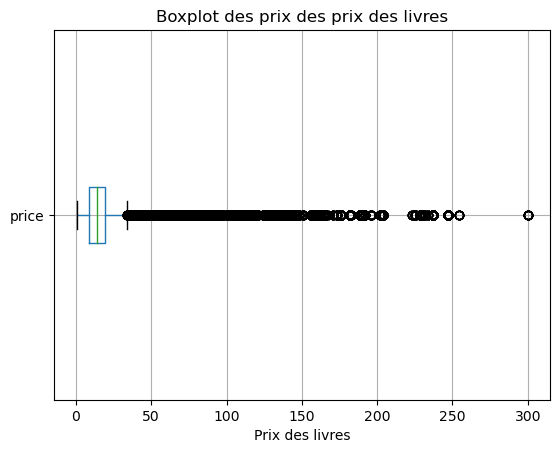

In [35]:
# Visualisation des outliers grâce à un bloxplot
ProdTransCust.boxplot(column="price", vert=False)
plt.xlabel('Prix des livres')
plt.title("Boxplot des prix des prix des livres")
plt.show()
plt.show()

In [36]:
# Calculer les quartiles
Q1 = ProdTransCust['price'].quantile(0.25)
Q2 = ProdTransCust['price'].quantile(0.5)
Q3 = ProdTransCust['price'].quantile(0.75)

# Calculer l'interquartile
IQR = Q3 - Q1

print("Premier quartile : ", Q1)
print("Deuxième quartile (médiane) : ", Q2)
print("Troisième quartile : ", Q3)
print("Interquartile : ", IQR)

Premier quartile :  8.87
Deuxième quartile (médiane) :  13.99
Troisième quartile :  18.99
Interquartile :  10.12


In [37]:
# Calcul du mode
Mode=ProdTransCust['price'].mode()
#Calcul de la moyenne des prix 
MoyPrix=ProdTransCust['price'].mean()
# Prix médiaProdTransCustn
PrixMedian=ProdTransCust['price'].median()
print("Les prix les plus fréquents sont de :", Mode)
print("La moyenne des prix: ", round(MoyPrix,2))
print("Le prix médian : ", PrixMedian)

Les prix les plus fréquents sont de : 0    15.99
Name: price, dtype: float64
La moyenne des prix:  17.45
Le prix médian :  13.99


In [38]:
#Calcul de variance
Variance=ProdTransCust['price'].var()
# Calcul de l'écart-type
EcartType=ProdTransCust['price'].std()
round(EcartType,2)
#Calcul du Coefficient de variation
CV=(ProdTransCust['price'].std()/ProdTransCust['price'].mean())*100

print("Résultat pour la variance: ", round(Variance,2))
print("Résultat pour l'écart-type: ", round(EcartType,2))
print("Résultat pour le coefficient de variance : ", round(CV,2))

Résultat pour la variance:  335.84
Résultat pour l'écart-type:  18.33
Résultat pour le coefficient de variance :  104.99


### 4. Représentez la distribution empirique d'une variable :
**1. variables qualitatives**

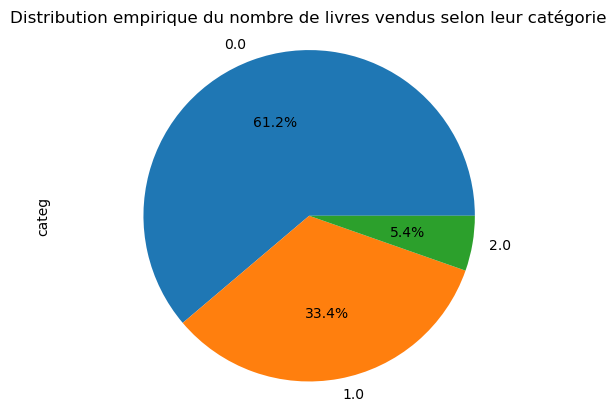

In [39]:
# Diagramme en secteurs
ProdTransCust["categ"].value_counts(normalize=True).plot(kind='pie', subplots=True,autopct='%1.1f%%')
# Cette ligne assure que le pie chart est un cercle plutôt qu'une éllipse
plt.title("Distribution empirique du nombre de livres vendus selon leur catégorie")
plt.axis('equal') 
plt.show() # Affiche le graphique


Voici le code qui a généré le tableau récapitulatif de la variable categ.

In [40]:
effectifs = ProdTransCust["categ"].value_counts()
modalites = effectifs.index # l'index de effectifs contient les modalités

tab = pd.DataFrame(modalites, columns = ["categ"]) # création du tableau à partir des modalités
tab["n"] = effectifs.values
tab["f"] = tab["n"] / len(ProdTransCust) # len(data) renvoie la taille de l'échantillon

display(tab)

,categ,n,f
0,0.0,415680,0.611895
1,1.0,227169,0.334401
2,2.0,36483,0.053704


**2. Variables quantitatives**

In [41]:
ProdTransCust['quart_mois'] = [int((jour-1)*4/31)+1 for jour in ProdTransCust["Date"].dt.day]


C:\Users\bello\AppData\Local\Temp\ipykernel_24664\1884504144.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ProdTransCust['quart_mois'] = [int((jour-1)*4/31)+1 for jour in ProdTransCust["Date"].dt.day]


<div style="background-color: RGB(0,200,100);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 4 - Traitement et transformation des données  </h2>
</div>

<div style="border: 5px solid RGB(0,200,100);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,200,100); ">3.2. PARTIE 1- Analyse des différents indicateurs de vente</h3>
</div>

<div style="border: 1px solid RGB(0,200,100);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,200,100); ">3.2.1 - Indicateurs et graphiques liés chiffres d'affaire</h3>
</div>

### 3.2.1.1- Calcul du chiffre d'affaires par produits

In [42]:
CA_Produit=ProdTransCust.groupby(['id_prod','categ','price'])['price'].sum()

In [43]:
CA_ParProduit=ProdTransCust.groupby(['id_prod','categ','price'])['price','birth'].sum()
#Renommer la colonne "price" en "Chiffre d'affaire"
CA_ParProduit=CA_ParProduit.rename(columns={'price':"Chiffre d'affaires"})
CA_ParProduit=CA_ParProduit.drop(columns=['birth'])
CA_ParProduit=CA_ParProduit.reset_index()


C:\Users\bello\AppData\Local\Temp\ipykernel_24664\837922532.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  CA_ParProduit=ProdTransCust.groupby(['id_prod','categ','price'])['price','birth'].sum()


In [44]:
CA_ParProduit["Chiffre d'affaires"].describe()

count     3266.000000
mean      3630.614304
std       7370.797437
min          0.990000
25%        233.832500
50%        797.220000
75%       3410.242500
max      94893.500000
Name: Chiffre d'affaires, dtype: float64

###  3.2.1.2 - Les 10 produits qui ont le meilleurs chiffre d'affaires

In [45]:
CA_ParProduit.sort_values("Chiffre d'affaires", ascending=False).head(10)

,id_prod,categ,price,Chiffre d'affaires
3097,2_159,2.0,145.99,94893.50
3071,2_135,2.0,68.99,69334.95
3046,2_112,2.0,67.57,65407.76
3035,2_102,2.0,59.14,60736.78
3153,2_209,2.0,69.99,56971.86
2620,1_395,1.0,28.99,54356.25
2592,1_369,1.0,23.99,54025.48
3044,2_110,2.0,62.25,53846.25
3202,2_39,2.0,57.99,53060.85
3105,2_166,2.0,230.04,52449.12


###  3.2.1.3 - Calcul du chiffre d'affaires total

In [46]:
CA_Total=CA_ParProduit["Chiffre d'affaires"].sum()
print("Le chiffre d'affaires total est de:", CA_Total,"€" )

Le chiffre d'affaires total est de: 11857586.318451043 €


### 3.2.1.4 - Calcul du chiffre d'affaires total par catégorie

In [47]:
CA_ParCategorie=CA_ParProduit.groupby(['categ'])["Chiffre d'affaires"].sum()
CA_ParCategorie=CA_ParCategorie.reset_index()
CA_ParCategorie

,categ,Chiffre d'affaires
0,0.0,4.423589e+06
1,1.0,4.653723e+06
2,2.0,2.780275e+06


In [48]:
round( CA_ParCategorie["Chiffre d'affaires"].describe())

count          3.0
mean     3952529.0
std      1021702.0
min      2780275.0
25%      3601932.0
50%      4423589.0
75%      4538656.0
max      4653723.0
Name: Chiffre d'affaires, dtype: float64

### 3.2.1.5 - Calcul du chiffre d'affaires par période

In [49]:
#Création de la colonne "Année" dans le dataframe "ProdTransCust"
ProdTransCust['Année']=ProdTransCust['Date'].dt.year

#Création de la colonne "trimestre" dans le dataframe "PrixEleve_CA1"
ProdTransCust['trimestre']=ProdTransCust['Date'].dt.quarter

ProdTransCust=ProdTransCust.sort_values('Année')

C:\Users\bello\AppData\Local\Temp\ipykernel_24664\638607842.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ProdTransCust['Année']=ProdTransCust['Date'].dt.year
C:\Users\bello\AppData\Local\Temp\ipykernel_24664\638607842.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ProdTransCust['trimestre']=ProdTransCust['Date'].dt.quarter


In [50]:
ProdTransCust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679332 entries, 207151 to 472977
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     679332 non-null  object        
 1   price       679332 non-null  float64       
 2   categ       679332 non-null  float64       
 3   session_id  679332 non-null  object        
 4   client_id   679332 non-null  object        
 5   Date        679332 non-null  datetime64[ns]
 6   sex         679332 non-null  object        
 7   birth       679332 non-null  float64       
 8   quart_mois  679332 non-null  int64         
 9   Année       679332 non-null  int64         
 10  trimestre   679332 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(3), object(4)
memory usage: 62.2+ MB


***Chiffre d'affaires par année***

In [51]:
#Création du dataframe "CA_ParAnnee"
CA_ParAnnee=ProdTransCust[['Année','price']]
# Aggrégation par année  et calcul du chiffre d'affaire
CA_ParAnnee=CA_ParAnnee.groupby(['Année'])['price'].sum()
CA_ParAnnee=CA_ParAnnee.reset_index()
#Renommer la colonne "price" en "Chiffre d'affaire"
CA_ParAnnee=CA_ParAnnee.rename(columns={'price':"Chiffre d'affaire"})
CA_ParAnnee=CA_ParAnnee.reset_index()
CA_ParAnnee

,index,Année,Chiffre d'affaire
0,0,2021,4.772345e+06
1,1,2022,6.110776e+06
2,2,2023,9.744647e+05


***Chiffre d'affaires par année et par trimestre***

In [52]:
#Création du dataframe "CA_ParPeriode"
CA_ParPeriode=ProdTransCust[['Année','trimestre','price']]
# Aggrégation par année et par trimestre et calcul du chiffre d'affaire
CA_ParPeriode=ProdTransCust.groupby(['Année','trimestre'])['price'].sum()
CA_ParPeriode=CA_ParPeriode.reset_index()
#Renommer la colonne "price" en "Chiffre d'affaire"
CA_ParPeriode=CA_ParPeriode.rename(columns={'price':"Chiffre d'affaires"})
CA_ParPeriode=CA_ParPeriode.reset_index()
CA_ParPeriode

,index,Année,trimestre,Chiffre d'affaires
0,0,2021,1,4.825977e+05
1,1,2021,2,1.453648e+06
2,2,2021,3,1.472797e+06
3,3,2021,4,1.363303e+06
4,4,2022,1,1.576838e+06
5,5,2022,2,1.506794e+06
6,6,2022,3,1.511871e+06
7,7,2022,4,1.515274e+06
8,8,2023,1,9.744647e+05


In [53]:
CA_ParPeriode2021=CA_ParPeriode.loc[CA_ParPeriode['Année']==2021]
CA_ParPeriode2022=CA_ParPeriode.loc[CA_ParPeriode['Année']==2022]
CA_ParPeriode2023=CA_ParPeriode.loc[CA_ParPeriode['Année']==2023]

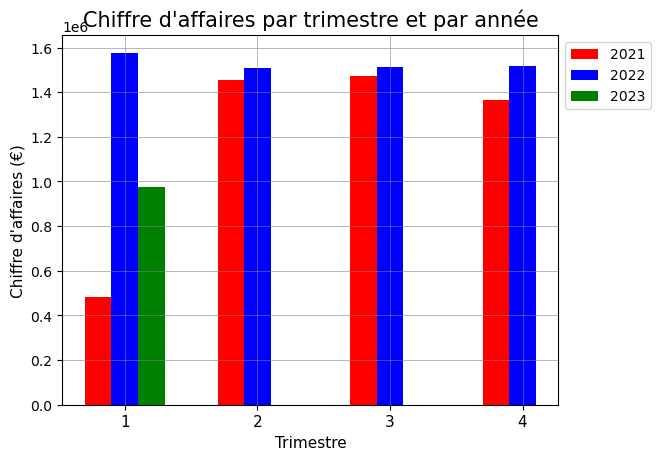

In [54]:
trimestres = np.arange(len(CA_ParPeriode2021['trimestre']))  # Positions horizontales des barres

width_2021 = 0.2  # Largeur des barres pour l'année 2021
width_2022 = 0.2  # Largeur des barres pour l'année 2022
width_2023 = 0.2  # Largeur des barres pour l'année 2023

# Diagramme en tuyaux d'orgue
plt.bar(trimestres - width_2021, CA_ParPeriode2021["Chiffre d'affaires"], color="red", width=width_2021)
plt.bar(trimestres, CA_ParPeriode2022["Chiffre d'affaires"], color="blue", width=width_2022)
plt.bar(width_2023, CA_ParPeriode2023["Chiffre d'affaires"], color="green", width=width_2023)

plt.title("Chiffre d'affaires par trimestre et par année", fontsize=15)
plt.xlabel("Trimestre", fontsize=11)
plt.ylabel("Chiffre d'affaires (€)", fontsize=11)
plt.xticks(trimestres, CA_ParPeriode2021['trimestre'], fontsize=11)  # Positionnement des étiquettes des trimestres sur l'axe x
plt.grid(color='gray', linestyle='-', linewidth=0.4)
plt.legend(['2021', '2022', '2023'], loc='upper right', bbox_to_anchor=(1.2, 1))

plt.show()

***Chiffre d'affaires par année et par catégorie***

In [55]:
#Création du dataframe "CA_ParPeriodeParCateg"
CA_ParPeriodeParCateg=ProdTransCust[['Année','categ','price']]
# Aggrégation par année et par trimestre et calcul du chiffre d'affaire
CA_ParPeriodeParCateg=CA_ParPeriodeParCateg.groupby(['Année','categ'])['price'].sum()
CA_ParPeriodeParCateg=CA_ParPeriodeParCateg.reset_index()
#Renommer la colonne "price" en "Chiffre d'affaire"
CA_ParPeriodeParCateg=CA_ParPeriodeParCateg.rename(columns={'price':"Chiffre d'affaires"})
CA_ParPeriodeParCateg=CA_ParPeriodeParCateg.reset_index()
CA_ParPeriodeParCateg

,index,Année,categ,Chiffre d'affaires
0,0,2021,0.0,1.884539e+06
1,1,2021,1.0,1.777996e+06
2,2,2021,2.0,1.109810e+06
3,3,2022,0.0,2.195065e+06
4,4,2022,1.0,2.485275e+06
5,5,2022,2.0,1.430436e+06
6,6,2023,0.0,3.439844e+05
7,7,2023,1.0,3.904516e+05
8,8,2023,2.0,2.400286e+05


In [56]:
CA_ParPeriodeParCateg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               9 non-null      int64  
 1   Année               9 non-null      int64  
 2   categ               9 non-null      float64
 3   Chiffre d'affaires  9 non-null      float64
dtypes: float64(2), int64(2)
memory usage: 416.0 bytes


In [57]:
CA_ParPeriodeParCateg2021=CA_ParPeriodeParCateg.loc[CA_ParPeriodeParCateg['Année']==2021]
CA_ParPeriodeParCateg2022=CA_ParPeriodeParCateg.loc[CA_ParPeriodeParCateg['Année']==2022]
CA_ParPeriodeParCateg2023=CA_ParPeriodeParCateg.loc[CA_ParPeriodeParCateg['Année']==2023]

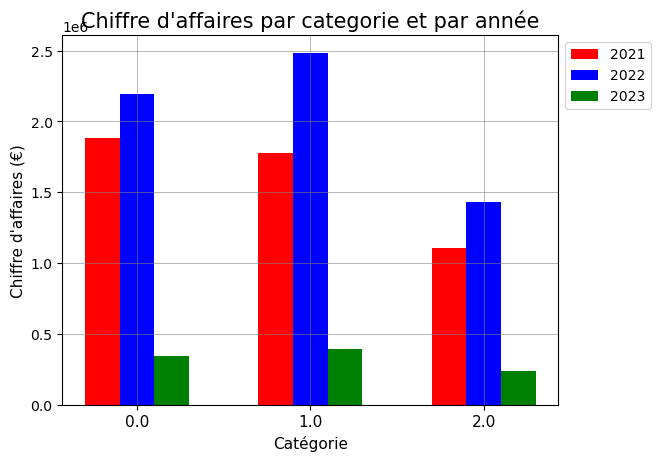

In [58]:
import numpy as np
import matplotlib.pyplot as plt

categ = CA_ParPeriodeParCateg2021['categ']  # Positions horizontales des barres

width_2021 = 0.2  # Largeur des barres pour l'année 2021
width_2022 = 0.2  # Largeur des barres pour l'année 2022
width_2023 = 0.2  # Largeur des barres pour l'année 2023

# Diagramme en tuyaux d'orgue
plt.bar(categ - width_2021, CA_ParPeriodeParCateg2021["Chiffre d'affaires"], color="red", width=width_2021)
plt.bar(categ, CA_ParPeriodeParCateg2022["Chiffre d'affaires"], color="blue", width=width_2022)
plt.bar(categ + width_2023, CA_ParPeriodeParCateg2023["Chiffre d'affaires"], color="green", width=width_2023)

plt.title("Chiffre d'affaires par categorie et par année", fontsize=15)
plt.xlabel("Catégorie", fontsize=11)
plt.ylabel("Chiffre d'affaires (€)", fontsize=11)
plt.xticks(categ, CA_ParPeriodeParCateg2021['categ'], fontsize=11)  # Positionnement des étiquettes des catégories sur l'axe x
plt.grid(color='gray', linestyle='-', linewidth=0.4)
plt.legend(['2021', '2022', '2023'], loc='upper right', bbox_to_anchor=(1.2, 1))

plt.show()


### <div style="border: 1px solid RGB(0,200,100);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,200,100); ">3.2.2 - Évolution du chiffres d'affaire dans le temps et tendance globale  </h3>
</div>

In [59]:
# Transformer la colonne "date" au format année-mois (YYYY-MM)

ProdTransCust['date']=ProdTransCust['Date'].dt.strftime('%Y-%m')
CA_ParPeriodeParDate=ProdTransCust.groupby(['date'])['price','birth'].sum()

#Renommer la colonne "price" en "Chiffre d'affaire"
CA_ParPeriodeParDate=CA_ParPeriodeParDate.rename(columns={'price':"Chiffre d'affaires"})
# Suppression de la colonne "birth"
CA_ParPeriodeParDate=CA_ParPeriodeParDate.drop(columns=['birth'])
CA_ParPeriodeParDate=CA_ParPeriodeParDate.reset_index()

CA_ParPeriodeParDate

C:\Users\bello\AppData\Local\Temp\ipykernel_24664\1741368189.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  CA_ParPeriodeParDate=ProdTransCust.groupby(['date'])['price','birth'].sum()


,date,Chiffre d'affaires
0,2021-03,482597.708398
1,2021-04,476353.675286
2,2021-05,493083.113021
3,2021-06,484210.747643
4,2021-07,482905.221510
5,2021-08,482441.888398
6,2021-09,507450.144531
7,2021-10,320920.927643
8,2021-11,516342.283776
9,2021-12,526039.467643


### Moyenne mobile

In [60]:
#Moyenne mobile sur 3 mois

CA_ParPeriodeParDate['moyenne_mobile'] = CA_ParPeriodeParDate["Chiffre d'affaires"].rolling(window=3).mean()
CA_ParPeriodeParDate

,date,Chiffre d'affaires,moyenne_mobile
0,2021-03,482597.708398,NaN
1,2021-04,476353.675286,NaN
2,2021-05,493083.113021,484011.498902
3,2021-06,484210.747643,484549.178650
4,2021-07,482905.221510,486733.027392
5,2021-08,482441.888398,483185.952517
6,2021-09,507450.144531,490932.418147
7,2021-10,320920.927643,436937.653524
8,2021-11,516342.283776,448237.785317
9,2021-12,526039.467643,454434.226354


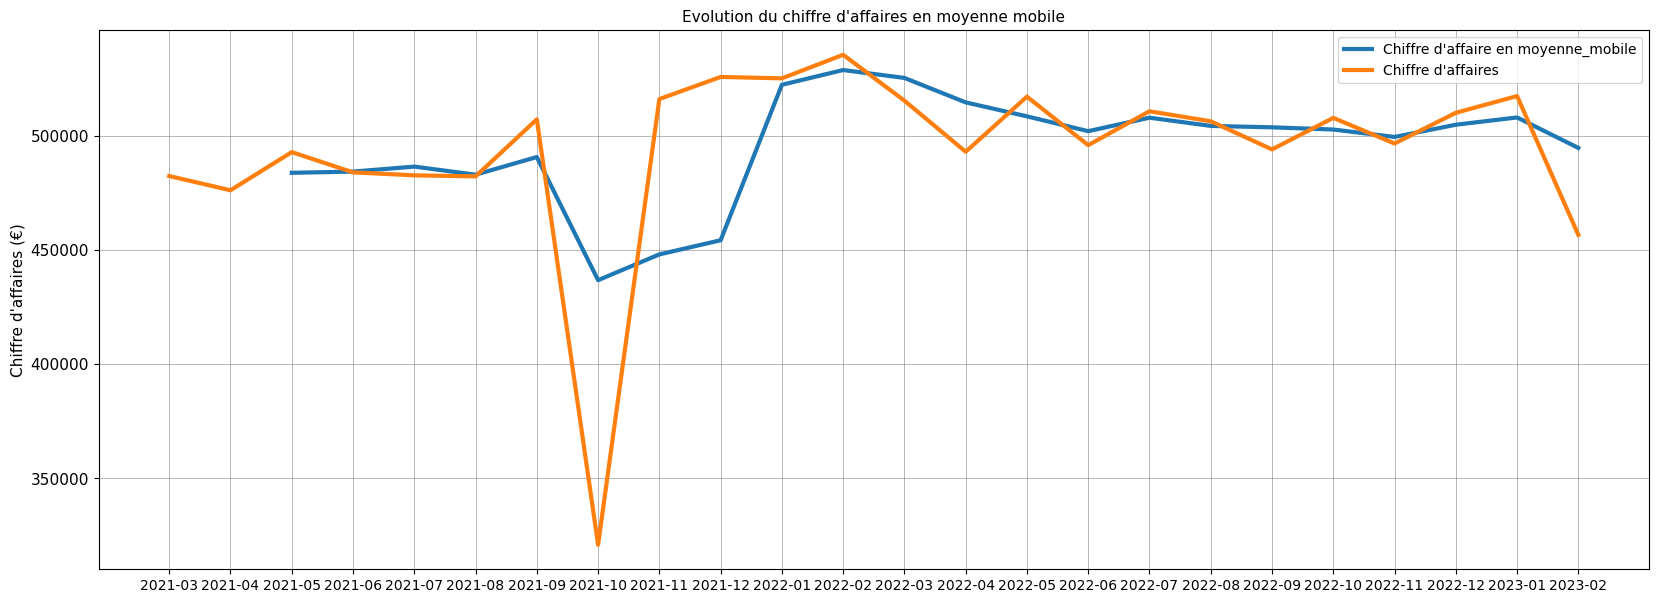

In [61]:
#Graphique représentant les tendances de l'évolution  du chiffre d'affaire et le chiffre d'affaire en moyenne mobile
plt.figure(figsize=(20, 7))
plt.plot(CA_ParPeriodeParDate['date'],CA_ParPeriodeParDate["moyenne_mobile"], label="Chiffre d'affaire en moyenne_mobile", linewidth=3)
plt.legend(loc='upper right')
plt.plot(CA_ParPeriodeParDate['date'],CA_ParPeriodeParDate["Chiffre d'affaires"], label="Chiffre d'affaires", linewidth=3)
plt.legend(loc='upper right')
plt.ylabel("Chiffre d'affaires (€)", fontsize=11)
plt.yticks(fontsize=11)
plt.title("Evolution du chiffre d'affaires en moyenne mobile", fontsize=11)
plt.grid(color='gray', linestyle='-', linewidth=0.4)

plt.show()

**<span style="color:blue">La moyenne mobile sur 3 mois nous permet d'observer que la ligne de la moyenne mobile est relativement stable par rapport à celle du chiffre d'affaire sur les 2 années qui ont suivis la création de la librairie en ligne.Dans la période allant de Semptembre 2021 à Janvier 2022, on observe une chute drastique mais brève du chiffre d'affaire en octobre 2021 suivit d'une remontée vertigineuse en novembre 2022. Ensuite le chiffre d'affaire redevient relativement stable autour des 500 000€. En revanche, la moyenne mobile montre une décroissance en octobre 2019 qui est certe moins importante que le chiffre d'affaire normal mais cette décroissance s'étend jusqu'à Janvier 2022. 
Le site a 2ans d'existence, les fluctuations observées indiquent que ce n'est pas dû à un cycle saisonnier, si la tendance se confirme dans les années à venir il faut vérifier si ce n'est pas causé par des facteurs économiques, concurrentiels ou externes  <span>**

## Déterminer la cause de la chute du chiffre d'affaire

In [62]:
ProdTransCust

,id_prod,price,categ,session_id,client_id,Date,sex,birth,quart_mois,Année,trimestre,date
207151,0_1340,14.76,0.0,s_75901,c_5520,2021-08-15 03:52:13,f,1983.0,2,2021,3,2021-08
201958,0_1064,4.57,0.0,s_26550,c_4038,2021-04-27 14:26:20,f,1979.0,4,2021,2,2021-04
550097,0_1011,13.99,0.0,s_118885,c_2683,2021-11-13 05:16:11,m,1960.0,2,2021,4,2021-11
347677,1_432,24.20,1.0,s_8060,c_8031,2021-03-18 14:28:43,f,1966.0,3,2021,1,2021-03
550095,1_721,21.99,1.0,s_70216,c_2683,2021-08-02 03:28:37,m,1960.0,1,2021,3,2021-08
...,...,...,...,...,...,...,...,...,...,...,...,...
638005,1_729,31.99,1.0,s_323303,c_3595,2023-01-07 10:28:14,f,1963.0,1,2023,1,2023-01
578289,0_1091,9.99,0.0,s_339630,c_8166,2023-02-10 15:55:57,f,1982.0,2,2023,1,2023-02
263224,0_1340,14.76,0.0,s_342312,c_7007,2023-02-16 06:32:01,f,1970.0,2,2023,1,2023-02
190286,0_1490,10.40,0.0,s_344459,c_4329,2023-02-20 17:45:38,f,1990.0,3,2023,1,2023-02


**<span style="color:blue">Nous allons allons comparer les chiffres d'affaires du mois de septembre qui s'est déroulé un mois avant la chute du chiffre d'affaire, le mpois d'octobre qui est le mois où l'on observe une forte décroissance et le mois de novembre où la croissance reprend de plus belle.  <span>**

### a. Mois de septembre

In [63]:
# Sélection du mois de septembre
Sept=ProdTransCust.loc[ProdTransCust['date']=="2021-09"]

# Création de "date2" qui supprimera l'heure permettant de connaître l'évolution journalière du chiffre d'affaire
Sept["date2"]=ProdTransCust['Date'].dt.strftime('%Y-%m-%d')
Sept

C:\Users\bello\AppData\Local\Temp\ipykernel_24664\891316795.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Sept["date2"]=ProdTransCust['Date'].dt.strftime('%Y-%m-%d')


,id_prod,price,categ,session_id,client_id,Date,sex,birth,quart_mois,Année,trimestre,date,date2
347675,0_1197,6.99,0.0,s_94258,c_8031,2021-09-23 12:45:59,f,1966.0,3,2021,3,2021-09,2021-09-23
201954,0_2084,10.80,0.0,s_92088,c_4038,2021-09-19 04:37:36,f,1979.0,3,2021,3,2021-09,2021-09-19
550100,1_363,16.99,1.0,s_88753,c_2683,2021-09-12 10:51:47,m,1960.0,2,2021,3,2021-09,2021-09-12
201944,1_396,18.60,1.0,s_92088,c_4038,2021-09-19 05:22:38,f,1979.0,3,2021,3,2021-09,2021-09-19
202045,1_441,24.99,1.0,s_94089,c_8612,2021-09-23 05:10:01,f,1965.0,3,2021,3,2021-09,2021-09-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610929,0_996,11.64,0.0,s_87860,c_1985,2021-09-10 16:34:43,m,1999.0,2,2021,3,2021-09,2021-09-10
103225,0_1358,16.49,0.0,s_90436,c_2242,2021-09-15 19:56:58,f,1991.0,2,2021,3,2021-09,2021-09-15
107221,0_1584,11.85,0.0,s_89755,c_7855,2021-09-14 11:31:53,f,1990.0,2,2021,3,2021-09,2021-09-14
107202,0_1449,4.99,0.0,s_90614,c_7855,2021-09-16 05:03:07,f,1990.0,2,2021,3,2021-09,2021-09-16


In [64]:
# Création de la colonne nombre de vente 
Sept2=Sept.groupby(['id_prod','categ','price',"date2"])['session_id'].count()
Sept2=pd.DataFrame(Sept2)
Sept2=Sept2.rename(columns={'session_id':"Nbre de vente"})
Sept2=Sept2.reset_index()
Sept2

,id_prod,categ,price,date2,Nbre de vente
0,0_0,0.0,3.75,2021-09-01,2
1,0_0,0.0,3.75,2021-09-02,1
2,0_0,0.0,3.75,2021-09-03,2
3,0_0,0.0,3.75,2021-09-05,3
4,0_0,0.0,3.75,2021-09-06,3
...,...,...,...,...,...
21045,2_96,2.0,47.91,2021-09-10,1
21046,2_96,2.0,47.91,2021-09-13,1
21047,2_96,2.0,47.91,2021-09-14,1
21048,2_96,2.0,47.91,2021-09-20,1


In [65]:
#Création de la colonne "Chiffre d'affaire"
Sept2["Chiffre d'affaire"]=Sept2["price"]*Sept2["Nbre de vente"]
Sept2

,id_prod,categ,price,date2,Nbre de vente,Chiffre d'affaire
0,0_0,0.0,3.75,2021-09-01,2,7.50
1,0_0,0.0,3.75,2021-09-02,1,3.75
2,0_0,0.0,3.75,2021-09-03,2,7.50
3,0_0,0.0,3.75,2021-09-05,3,11.25
4,0_0,0.0,3.75,2021-09-06,3,11.25
...,...,...,...,...,...,...
21045,2_96,2.0,47.91,2021-09-10,1,47.91
21046,2_96,2.0,47.91,2021-09-13,1,47.91
21047,2_96,2.0,47.91,2021-09-14,1,47.91
21048,2_96,2.0,47.91,2021-09-20,1,47.91


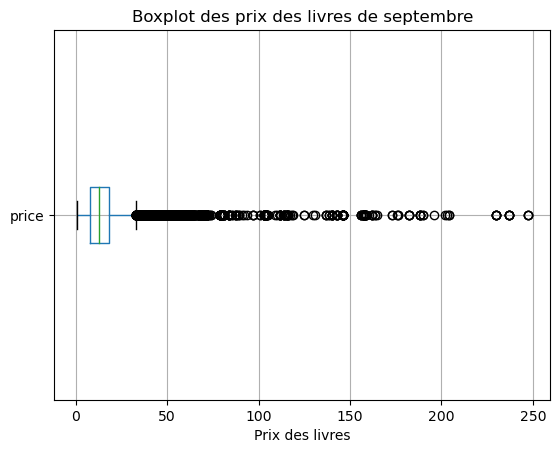

In [66]:
# Visualisation des prix négatif grâce à un bloxplot pour vérifier si ce n'est pas la cause d'un prix négatif
Sept2.boxplot(column="price", vert=False)
plt.xlabel('Prix des livres')
plt.title("Boxplot des prix des livres de septembre")
plt.show()


In [67]:
# Sélection permettant le filtrage d'une seule catégorie par dataframe
Sept_categ0=Sept2.loc[Sept2["categ"]==0]
Sept_categ1=Sept2.loc[Sept2["categ"]==1]
Sept_categ2=Sept2.loc[Sept2["categ"]==2]

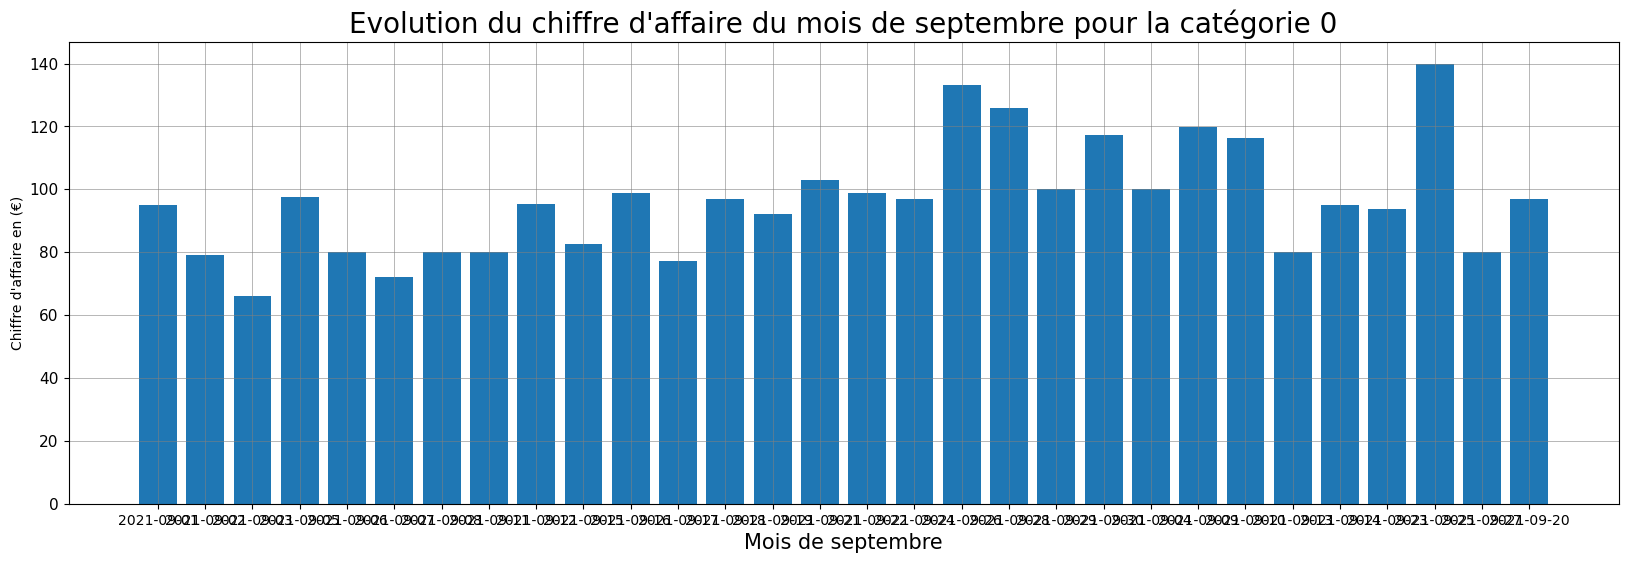

In [68]:

plt.figure(figsize=(20,6))
plt.bar(height=Sept_categ0["Chiffre d'affaire"], x=Sept_categ0['date2'])
plt.title("Evolution du chiffre d'affaire du mois de septembre pour la catégorie 0", fontsize=20)
plt.yticks(fontsize=11)
plt.xlabel('Mois de septembre', fontsize=15)
plt.ylabel("Chiffre d'affaire en (€)")
plt.grid(color='gray', linestyle='-', linewidth=0.4)
plt.show()

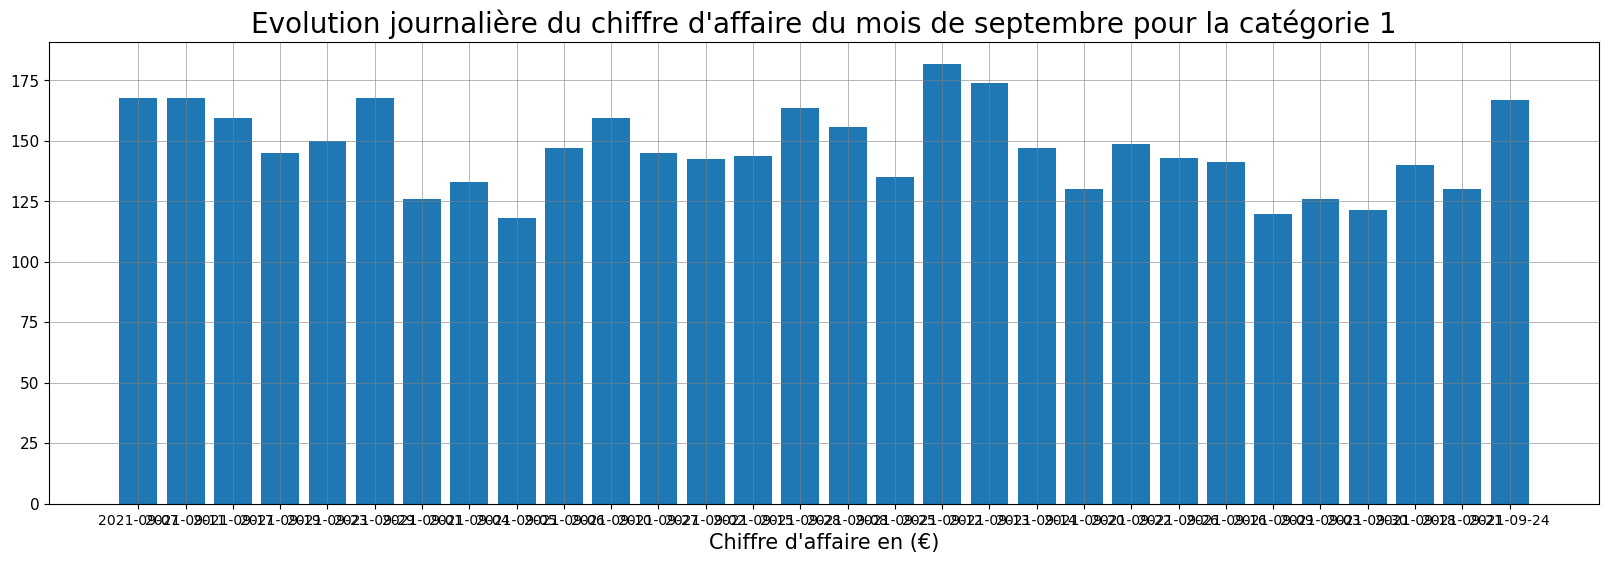

In [69]:
plt.figure(figsize=(20,6))
plt.bar(height=Sept_categ1["Chiffre d'affaire"], x=Sept_categ1['date2'])
plt.title("Evolution journalière du chiffre d'affaire du mois de septembre pour la catégorie 1", fontsize=20)
plt.yticks(fontsize=11)
plt.xlabel('Mois de septembre', fontsize=15)
plt.xlabel("Chiffre d'affaire en (€)")
plt.grid(color='gray', linestyle='-', linewidth=0.4)
plt.show()

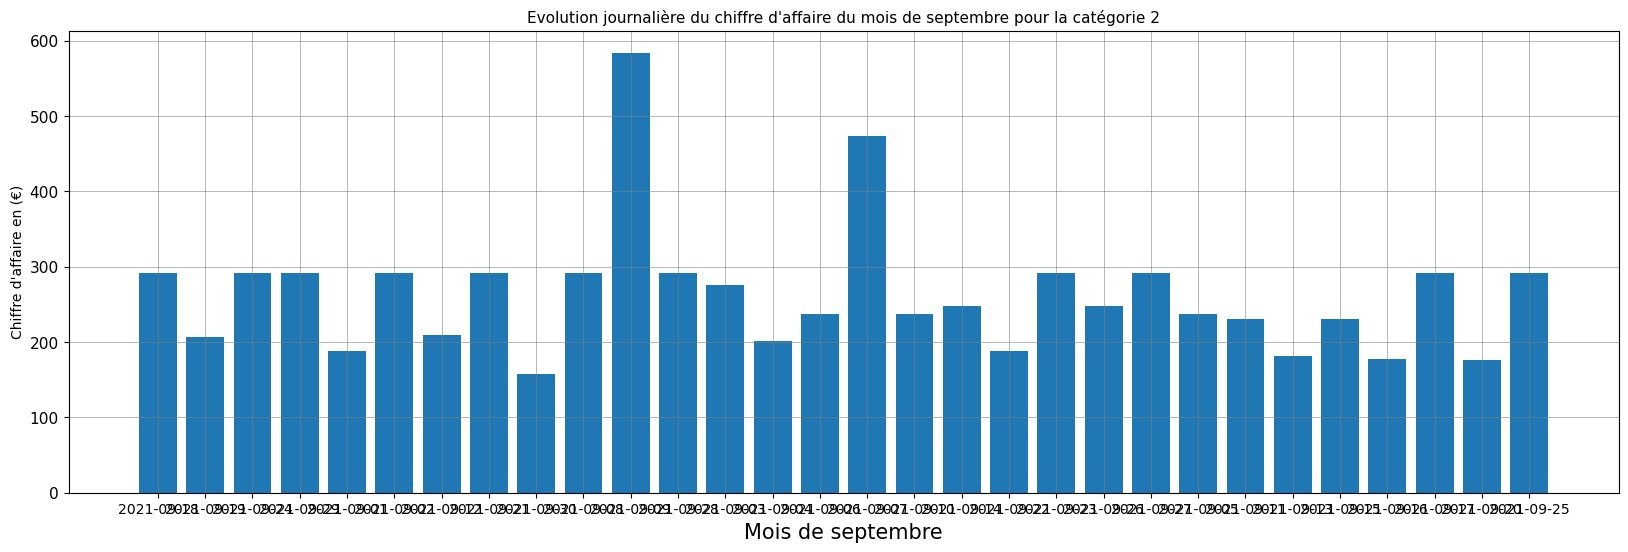

In [70]:
plt.figure(figsize=(20,6))
plt.bar(height=Sept_categ2["Chiffre d'affaire"], x=Sept_categ2['date2'])
plt.title("Evolution journalière du chiffre d'affaire du mois de septembre pour la catégorie 2", fontsize=11)
plt.yticks(fontsize=11)
plt.xlabel('Mois de septembre', fontsize=15)
plt.ylabel("Chiffre d'affaire en (€)")
plt.grid(color='gray', linestyle='-', linewidth=0.4)
plt.show()

### b. Mois de novembre

In [71]:
# Sélection du mois de novembre
Nov=ProdTransCust.loc[ProdTransCust['date']=="2021-11"]

# Création de "date2" qui supprimera l'heure permettant de connaître l'évolution journalière du chiffre d'affaire
Nov["date2"]=ProdTransCust['Date'].dt.strftime('%Y-%m-%d')
Nov

C:\Users\bello\AppData\Local\Temp\ipykernel_24664\742786686.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Nov["date2"]=ProdTransCust['Date'].dt.strftime('%Y-%m-%d')


,id_prod,price,categ,session_id,client_id,Date,sex,birth,quart_mois,Année,trimestre,date,date2
550097,0_1011,13.99,0.0,s_118885,c_2683,2021-11-13 05:16:11,m,1960.0,2,2021,4,2021-11,2021-11-13
347676,1_374,10.71,1.0,s_120700,c_8031,2021-11-16 22:28:37,f,1966.0,2,2021,4,2021-11,2021-11-16
550087,1_108,45.03,1.0,s_115504,c_2683,2021-11-06 09:00:17,m,1960.0,1,2021,4,2021-11,2021-11-06
201976,1_318,17.24,1.0,s_113727,c_8612,2021-11-02 13:54:40,f,1965.0,1,2021,4,2021-11,2021-11-02
201993,1_461,12.99,1.0,s_124336,c_8612,2021-11-24 10:28:05,f,1965.0,3,2021,4,2021-11,2021-11-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610926,1_310,14.20,1.0,s_124173,c_1985,2021-11-24 03:35:01,m,1999.0,3,2021,4,2021-11,2021-11-24
610928,1_406,24.81,1.0,s_124173,c_1985,2021-11-24 02:32:52,m,1999.0,3,2021,4,2021-11,2021-11-24
674163,0_1464,8.27,0.0,s_113073,c_2976,2021-11-01 06:43:26,f,1949.0,1,2021,4,2021-11,2021-11-01
610938,1_262,26.25,1.0,s_124173,c_1985,2021-11-24 02:22:21,m,1999.0,3,2021,4,2021-11,2021-11-24


In [72]:
# Création de la colonne nombre de vente 
Nov2=Nov.groupby(['id_prod','categ','price',"date2"])['session_id'].count()
Nov2=pd.DataFrame(Nov2)
Nov2=Nov2.rename(columns={'session_id':"Nbre de vente"})
Nov2=Nov2.reset_index()
Nov2

,id_prod,categ,price,date2,Nbre de vente
0,0_0,0.0,3.75,2021-11-01,4
1,0_0,0.0,3.75,2021-11-02,4
2,0_0,0.0,3.75,2021-11-03,2
3,0_0,0.0,3.75,2021-11-04,1
4,0_0,0.0,3.75,2021-11-05,3
...,...,...,...,...,...
18139,2_96,2.0,47.91,2021-11-25,2
18140,2_96,2.0,47.91,2021-11-26,1
18141,2_96,2.0,47.91,2021-11-29,1
18142,2_96,2.0,47.91,2021-11-30,1


In [73]:
#Création de la colonne "Chiffre d'affaire"
Nov2["Chiffre d'affaire"]=Nov2["price"]*Nov2["Nbre de vente"]
Nov2

,id_prod,categ,price,date2,Nbre de vente,Chiffre d'affaire
0,0_0,0.0,3.75,2021-11-01,4,15.00
1,0_0,0.0,3.75,2021-11-02,4,15.00
2,0_0,0.0,3.75,2021-11-03,2,7.50
3,0_0,0.0,3.75,2021-11-04,1,3.75
4,0_0,0.0,3.75,2021-11-05,3,11.25
...,...,...,...,...,...,...
18139,2_96,2.0,47.91,2021-11-25,2,95.82
18140,2_96,2.0,47.91,2021-11-26,1,47.91
18141,2_96,2.0,47.91,2021-11-29,1,47.91
18142,2_96,2.0,47.91,2021-11-30,1,47.91


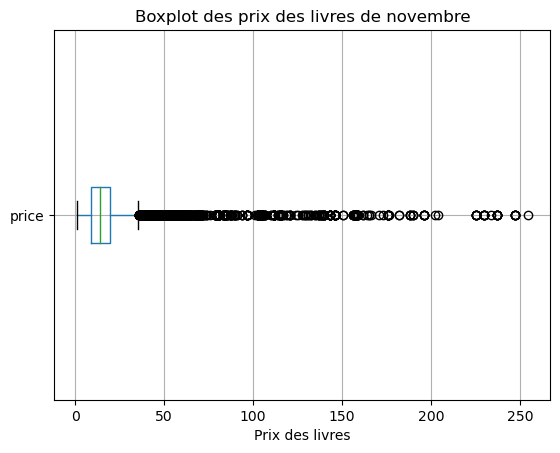

In [74]:
# Visualisation des prix négatif grâce à un bloxplot pour vérifier si ce n'est pas la cause d'un prix négatif
Nov2.boxplot(column="price", vert=False)
plt.xlabel('Prix des livres')
plt.title("Boxplot des prix des livres de novembre")
plt.show()


In [75]:
# Sélection permettant le filtrage d'une seule catégorie par dataframe
Nov_categ0=Nov2.loc[Nov2["categ"]==0]
Nov_categ1=Nov2.loc[Nov2["categ"]==1]
Nov_categ2=Nov2.loc[Nov2["categ"]==2]

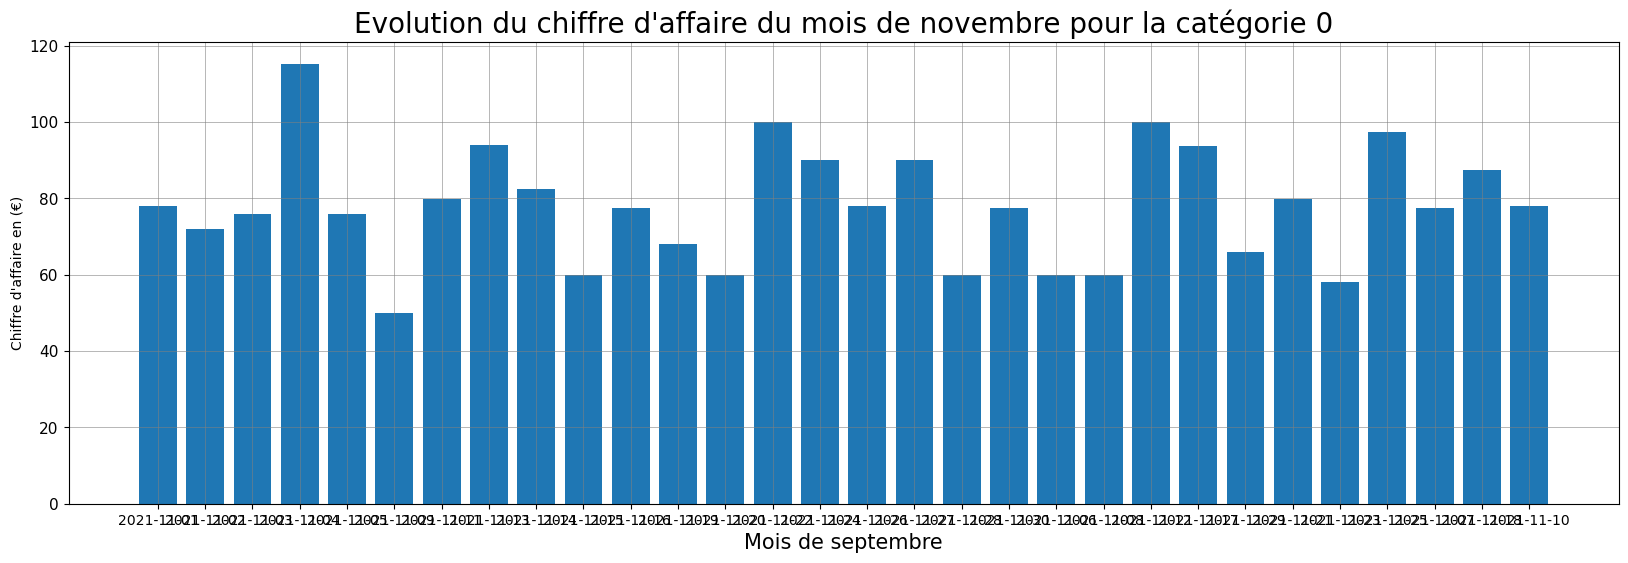

In [76]:
plt.figure(figsize=(20,6))
plt.bar(height=Nov_categ0["Chiffre d'affaire"], x=Nov_categ0['date2'])
plt.title("Evolution du chiffre d'affaire du mois de novembre pour la catégorie 0", fontsize=20)
plt.yticks(fontsize=11)
plt.xlabel('Mois de septembre', fontsize=15)
plt.ylabel("Chiffre d'affaire en (€)")
plt.grid(color='gray', linestyle='-', linewidth=0.4)
plt.show()

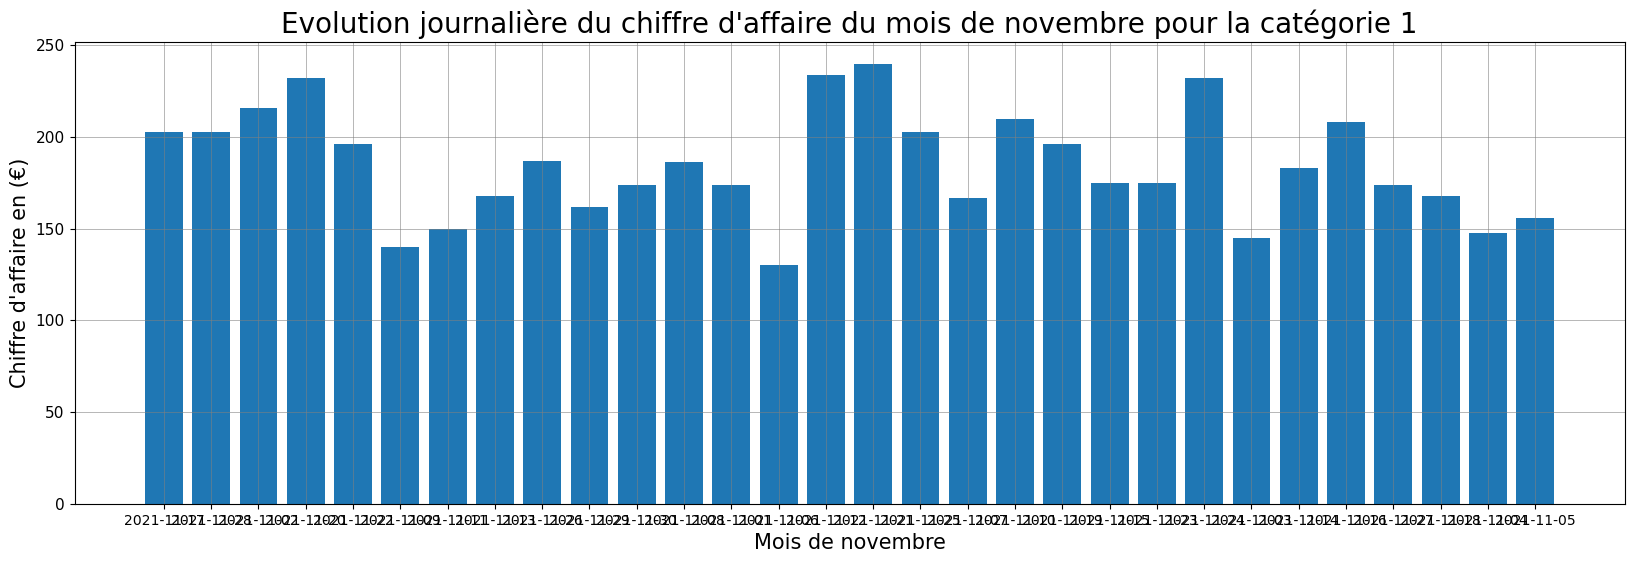

In [77]:
plt.figure(figsize=(20,6))
plt.bar(height=Nov_categ1["Chiffre d'affaire"], x=Nov_categ1['date2'])
plt.title("Evolution journalière du chiffre d'affaire du mois de novembre pour la catégorie 1", fontsize=20)
plt.yticks(fontsize=11)
plt.xlabel('Mois de novembre', fontsize=15)
plt.ylabel("Chiffre d'affaire en (€)", fontsize=15)
plt.grid(color='gray', linestyle='-', linewidth=0.4)
plt.show()

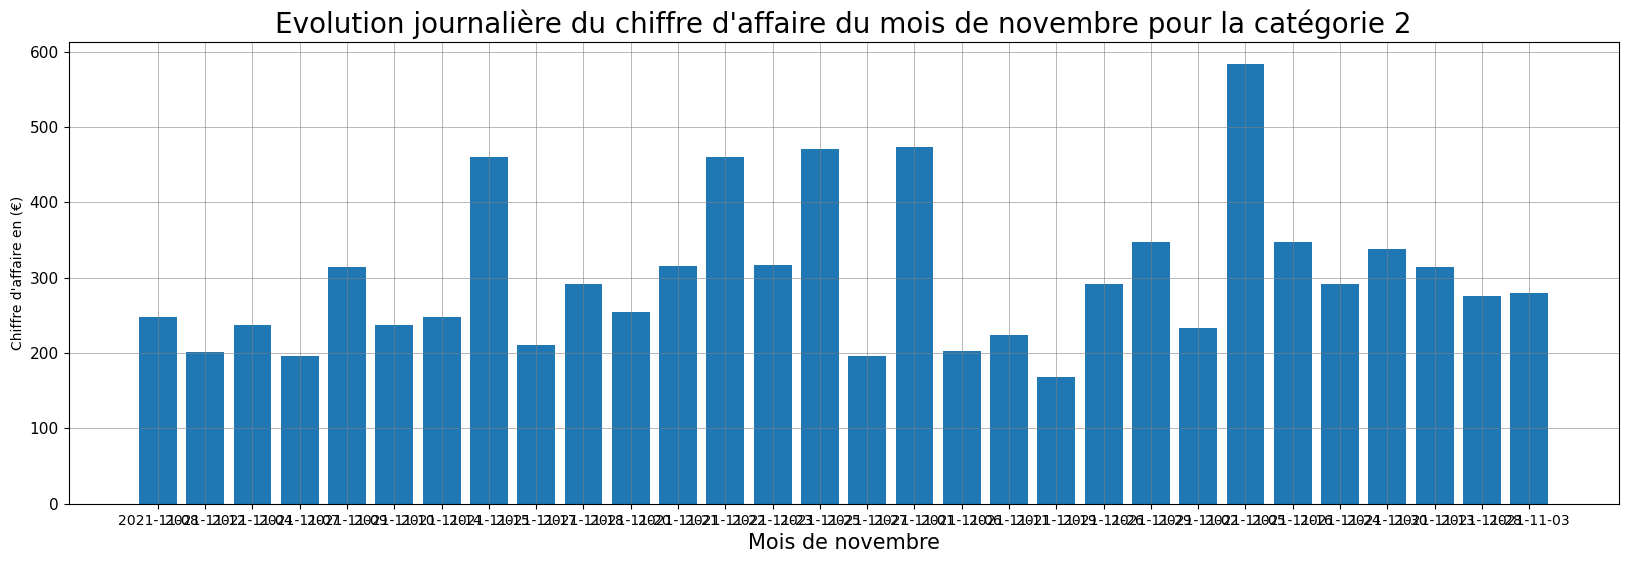

In [78]:
plt.figure(figsize=(20,6))
plt.bar(height=Nov_categ2["Chiffre d'affaire"], x=Nov_categ2['date2'])
plt.title("Evolution journalière du chiffre d'affaire du mois de novembre pour la catégorie 2", fontsize=20)
plt.yticks(fontsize=11)
plt.xlabel('Mois de novembre', fontsize=15)
plt.ylabel("Chiffre d'affaire en (€)")
plt.grid(color='gray', linestyle='-', linewidth=0.4)
plt.show()

### c. Mois d'octobre

In [79]:
# Sélection du mois d'octobre
Oct=ProdTransCust.loc[ProdTransCust['date']=="2021-10"]

# Création de "date2" qui supprimera l'heure permettant de connaître l'évolution journalière du chiffre d'affaire
Oct["date2"]=ProdTransCust['Date'].dt.strftime('%Y-%m-%d')
Oct

C:\Users\bello\AppData\Local\Temp\ipykernel_24664\2969939400.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Oct["date2"]=ProdTransCust['Date'].dt.strftime('%Y-%m-%d')


,id_prod,price,categ,session_id,client_id,Date,sex,birth,quart_mois,Année,trimestre,date,date2
347661,0_1619,4.99,0.0,s_103732,c_8031,2021-10-12 14:29:09,f,1966.0,2,2021,4,2021-10,2021-10-12
456959,0_1192,12.52,0.0,s_109697,c_2389,2021-10-25 00:56:17,m,1991.0,4,2021,4,2021-10,2021-10-25
201985,1_397,18.99,1.0,s_112302,c_8612,2021-10-30 14:03:08,f,1965.0,4,2021,4,2021-10,2021-10-30
456947,2_163,68.99,2.0,s_105359,c_5194,2021-10-15 23:49:04,m,1994.0,2,2021,4,2021-10,2021-10-15
456945,0_1357,15.99,0.0,s_104199,c_5194,2021-10-13 13:36:47,m,1994.0,2,2021,4,2021-10,2021-10-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
380454,0_1266,4.28,0.0,s_98692,c_4712,2021-10-02 01:23:50,f,1977.0,1,2021,4,2021-10,2021-10-02
613409,0_1354,7.02,0.0,s_112293,c_5780,2021-10-30 13:44:18,m,1950.0,4,2021,4,2021-10,2021-10-30
103217,0_2156,4.63,0.0,s_103726,c_2242,2021-10-12 13:36:53,f,1991.0,2,2021,4,2021-10,2021-10-12
436810,0_1590,18.93,0.0,s_102014,c_6934,2021-10-08 23:19:52,f,1977.0,1,2021,4,2021-10,2021-10-08


In [80]:
Oct.shape[0]

21606

In [81]:
ValManq=["n/a","na","--"," "]
valeursManquantes=Oct.loc[Oct['sex'].isin(ValManq),:]
valeursManquantes

,id_prod,price,categ,session_id,client_id,Date,sex,birth,quart_mois,Année,trimestre,date,date2


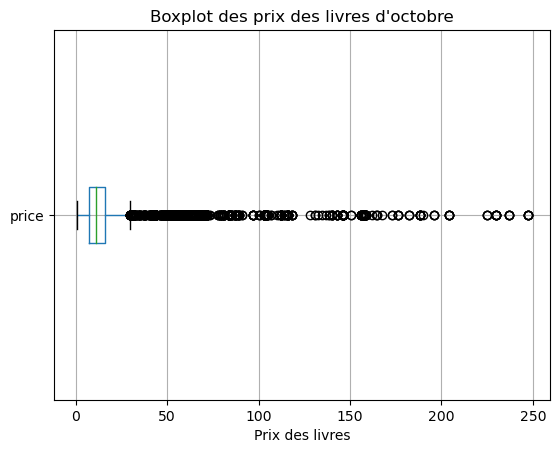

In [82]:
# Visualisation des outliers grâce à un bloxplot
Oct.boxplot(column="price", vert=False)
plt.xlabel('Prix des livres')
plt.title("Boxplot des prix des livres d'octobre")
plt.show()
plt.show()

In [83]:
Oct2=Oct.groupby(['id_prod','categ','price',"date2"])['session_id'].count()
Oct2=pd.DataFrame(Oct2)
Oct2=Oct2.rename(columns={'session_id':"Nbre de vente"})
Oct2=Oct2.reset_index()

In [84]:
Oct2["Chiffre d'affaire"]=Oct2["price"]*Oct2["Nbre de vente"]
Oct2

,id_prod,categ,price,date2,Nbre de vente,Chiffre d'affaire
0,0_0,0.0,3.75,2021-10-01,1,3.75
1,0_0,0.0,3.75,2021-10-02,1,3.75
2,0_0,0.0,3.75,2021-10-03,1,3.75
3,0_0,0.0,3.75,2021-10-04,3,11.25
4,0_0,0.0,3.75,2021-10-05,1,3.75
...,...,...,...,...,...,...
14891,2_96,2.0,47.91,2021-10-21,2,95.82
14892,2_96,2.0,47.91,2021-10-23,1,47.91
14893,2_96,2.0,47.91,2021-10-24,1,47.91
14894,2_96,2.0,47.91,2021-10-27,2,95.82


In [85]:
# Sélection permettant le filtrage d'une seule catégorie par dataframe
Oct_categ0=Oct2.loc[Oct2["categ"]==0]
Oct_categ1=Oct2.loc[Oct2["categ"]==1]
Oct_categ2=Oct2.loc[Oct2["categ"]==2]

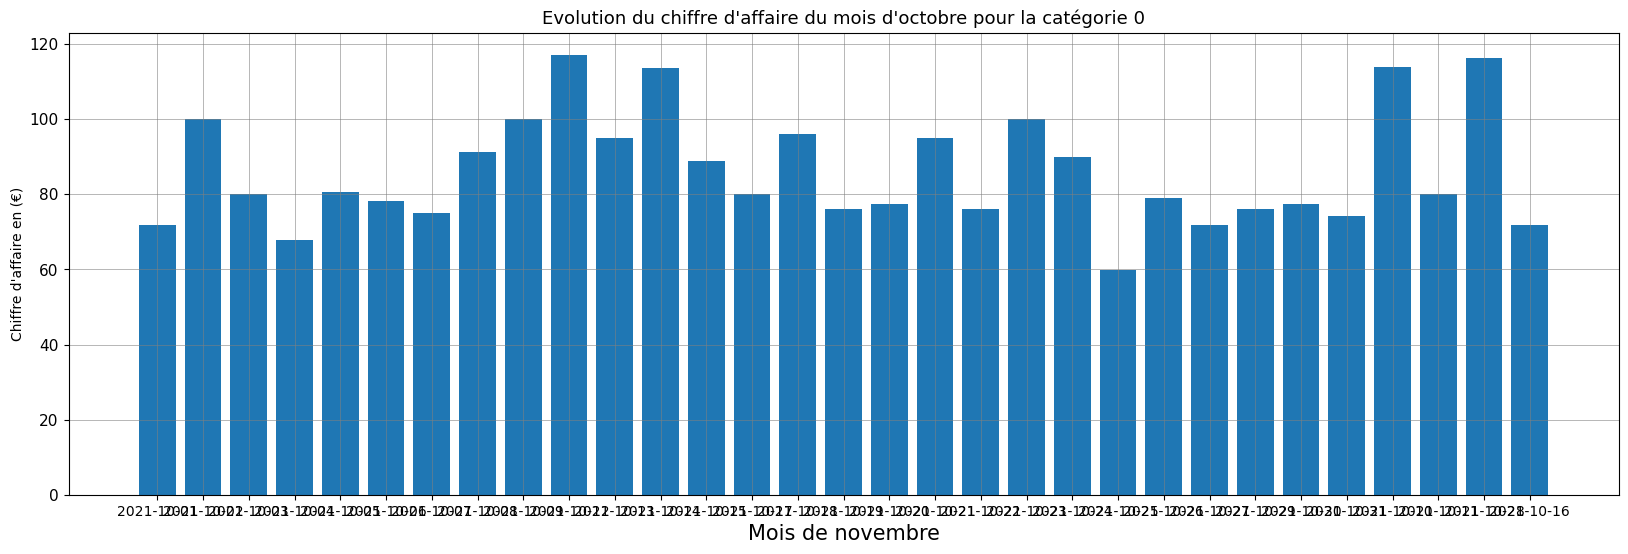

In [86]:
#Graphique représentant la catégorie 0
plt.figure(figsize=(20,6))
plt.bar(height=Oct_categ0["Chiffre d'affaire"], x=Oct_categ0['date2'])
plt.title("Evolution du chiffre d'affaire du mois d'octobre pour la catégorie 0", fontsize=13)
plt.yticks(fontsize=11)
plt.xlabel('Mois de novembre', fontsize=15)
plt.ylabel("Chiffre d'affaire en (€)")
plt.grid(color='gray', linestyle='-', linewidth=0.4)
plt.show()

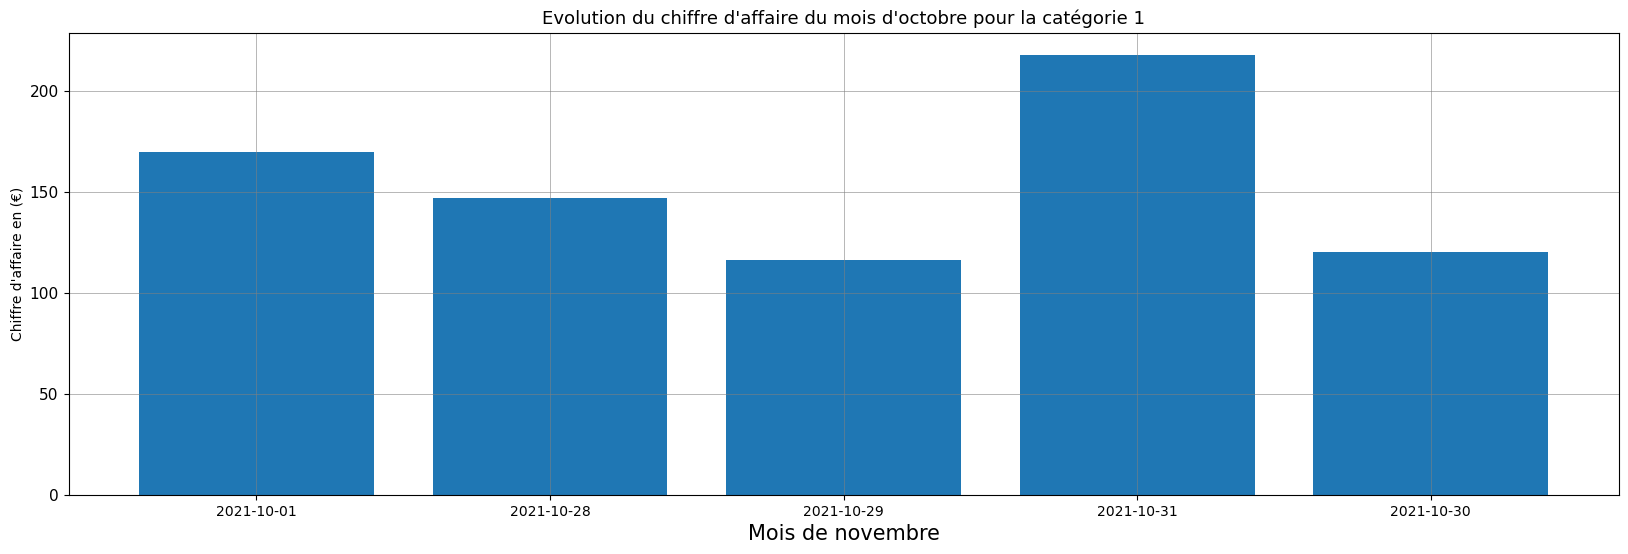

In [87]:
#Graphique représentant la catégorie 1
plt.figure(figsize=(20,6))
plt.bar(height=Oct_categ1["Chiffre d'affaire"], x=Oct_categ1['date2'])
plt.title("Evolution du chiffre d'affaire du mois d'octobre pour la catégorie 1", fontsize=13)
plt.yticks(fontsize=11)
plt.xlabel('Mois de novembre', fontsize=15)
plt.ylabel("Chiffre d'affaire en (€)")
plt.grid(color='gray', linestyle='-', linewidth=0.4)
plt.show()

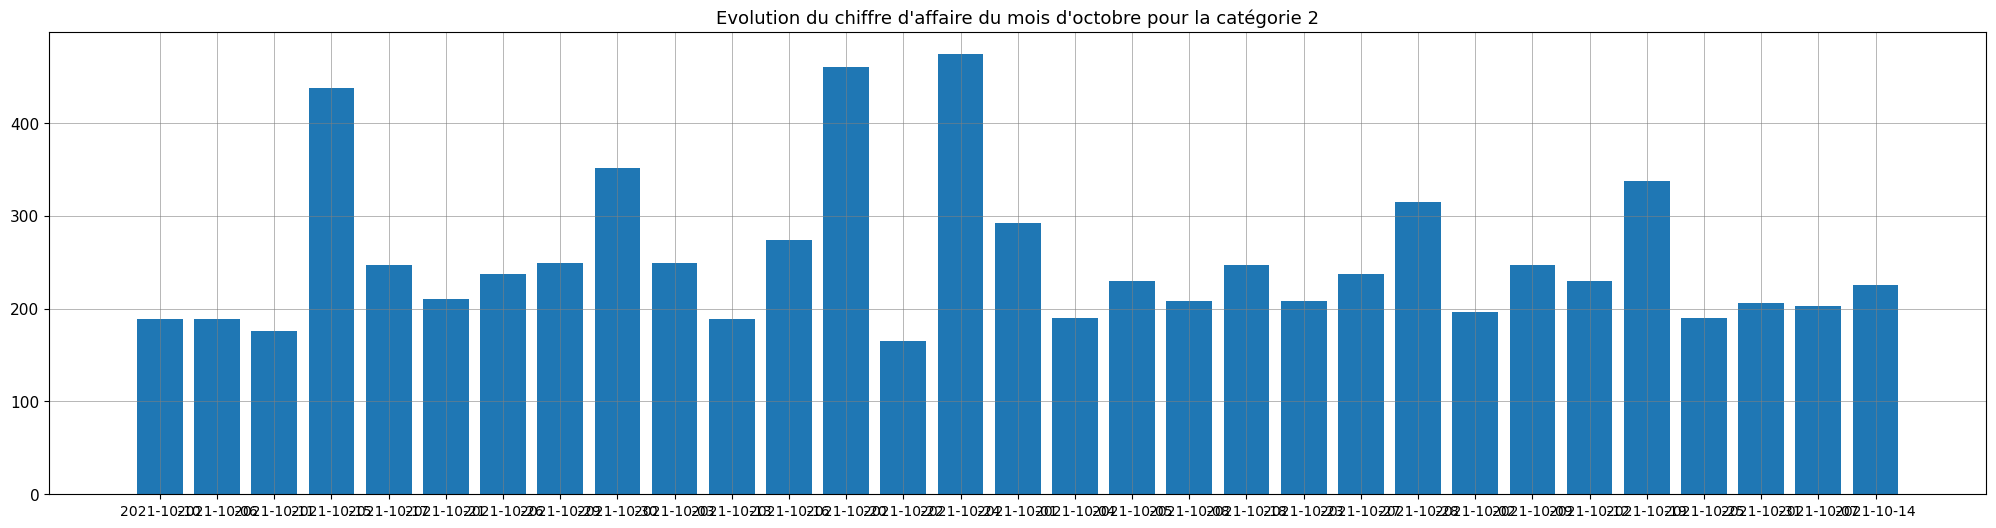

In [88]:
#Graphique représentant la catégorie 2
plt.figure(figsize=(25,6))
plt.bar(height=Oct_categ2["Chiffre d'affaire"], x=Oct_categ2['date2'])
plt.title("Evolution du chiffre d'affaire du mois d'octobre pour la catégorie 2", fontsize=13)
plt.yticks(fontsize=11)

plt.grid(color='gray', linestyle='-', linewidth=0.4)
plt.show()

In [89]:
#Création du dataframe "CA_ParPeriodeParCateg"
CA_ParPeriodeParCateg=ProdTransCust[['Année','categ','price']]
# Aggrégation par année et par trimestre et calcul du chiffre d'affaire
CA_ParPeriodeParCateg=CA_ParPeriodeParCateg.groupby(['Année','categ'])['price'].sum()
CA_ParPeriodeParCateg=CA_ParPeriodeParCateg.reset_index()
#Renommer la colonne "price" en "Chiffre d'affaire"
CA_ParPeriodeParCateg=CA_ParPeriodeParCateg.rename(columns={'price':"Chiffre d'affaires"})
CA_ParPeriodeParCateg=CA_ParPeriodeParCateg.reset_index()
CA_ParPeriodeParCateg

,index,Année,categ,Chiffre d'affaires
0,0,2021,0.0,1.884539e+06
1,1,2021,1.0,1.777996e+06
2,2,2021,2.0,1.109810e+06
3,3,2022,0.0,2.195065e+06
4,4,2022,1.0,2.485275e+06
5,5,2022,2.0,1.430436e+06
6,6,2023,0.0,3.439844e+05
7,7,2023,1.0,3.904516e+05
8,8,2023,2.0,2.400286e+05


**<span style="color:blue">Il manque des données sur les livres de catégorie 1 pour le mois d'octobre, il semble étrange que la catégorie 1 soit le moins vendu pour ce mois alors que globalement c'est la catégorie la plus vendue pour le reste de l'année, soit il y a ue moins de vente de ce type de produit soit il y a eu des problèmes pour enregistrer les ventes. Même les livres de catégorie 2 semblent mieux se vendre.<span>**

<div style="border: 1px solid RGB(0,200,100);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,200,100); ">3.2.3 - Zoom sur les références (meilleures et pires ventes)</h3>
</div>

In [90]:
# Création du dataframe "Références" en faisant une aggrégation par id_prod, categorie et prix et en comptant le nombre de vente
References=ProdTransCust.groupby(['id_prod','categ','price'])['session_id'].count()
References=pd.DataFrame(References)
References=References.rename(columns={'session_id':"Nbre de vente"})
References=References.reset_index()
References.head(20)

,id_prod,categ,price,Nbre de vente
0,0_0,0.0,3.75,1242
1,0_1,0.0,10.99,487
2,0_10,0.0,17.95,22
3,0_100,0.0,20.60,3
4,0_1000,0.0,6.84,432
5,0_1001,0.0,4.99,405
6,0_1002,0.0,8.31,482
7,0_1003,0.0,14.99,412
8,0_1004,0.0,8.07,401
9,0_1005,0.0,20.99,5


### 3.2.3.1 - Top références (meilleures performances)

On met le top 10 des meilleures références

In [91]:

TopReferences=References.sort_values("Nbre de vente", ascending=False)
TopReferences.head(10)

,id_prod,categ,price,Nbre de vente
2592,1_369,1.0,23.99,2252
2645,1_417,1.0,20.99,2189
2642,1_414,1.0,23.83,2180
2734,1_498,1.0,23.37,2128
2654,1_425,1.0,16.99,2096
2630,1_403,1.0,17.99,1960
2640,1_412,1.0,16.65,1951
2641,1_413,1.0,17.99,1945
2633,1_406,1.0,24.81,1939
2634,1_407,1.0,15.99,1935


### 3.2.3.2 - Flop références (moins performantes)

On met le top 10 des références les moins performantes

In [92]:
FlopReferences=References.sort_values(["Nbre de vente",'id_prod'])
FlopReferences.head(10)

,id_prod,categ,price,Nbre de vente
166,0_1151,0.0,2.99,1
313,0_1284,0.0,1.38,1
417,0_1379,0.0,2.99,1
549,0_1498,0.0,2.48,1
595,0_1539,0.0,0.99,1
665,0_1601,0.0,1.99,1
698,0_1633,0.0,24.99,1
752,0_1683,0.0,2.99,1
802,0_1728,0.0,2.27,1
1327,0_2201,0.0,20.99,1


**<span style="color:blue">Les meilleures ventes appartiennent tous à la catégorie 1 tandis que les livres les moins biens vendus sont de la catégories 0. <span>**

In [93]:
NbreVenteCateg=References.groupby(['categ'])["Nbre de vente"].count()
NbreVenteCateg

categ
0.0    2293
1.0     737
2.0     236
Name: Nbre de vente, dtype: int64

In [94]:
CA_ParCategorie

,categ,Chiffre d'affaires
0,0.0,4.423589e+06
1,1.0,4.653723e+06
2,2.0,2.780275e+06


### 3.2.3.3 - Répartition du nombre de ventes des références par catégorie

In [95]:
CA_ParProduit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3266 entries, 0 to 3265
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id_prod             3266 non-null   object 
 1   categ               3266 non-null   float64
 2   price               3266 non-null   float64
 3   Chiffre d'affaires  3266 non-null   float64
dtypes: float64(3), object(1)
memory usage: 102.2+ KB


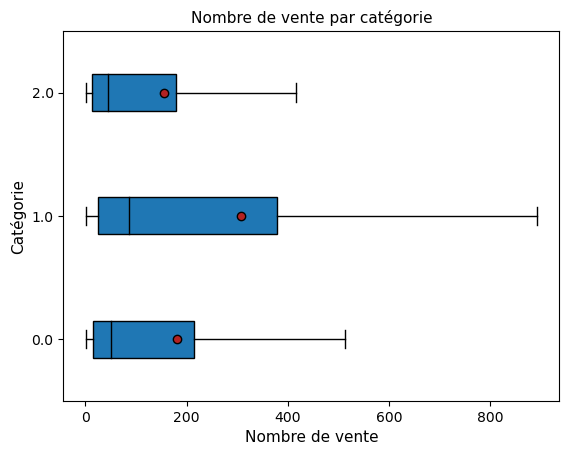

In [96]:
X = "categ" # qualitative
Y = "Nbre de vente" # quantitative


modalites = References[X].unique()
groupes = []
for m in modalites:
    groupes.append(References[References[X]==m][Y])

# Propriétés graphiques (pas très importantes)    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.title("Nombre de vente par catégorie", fontsize=11)
plt.xlabel("Nombre de vente", fontsize=11)
plt.ylabel("Catégorie", fontsize=11)
plt.show()

<span style="color:blue">
    
 **Catégorie 1 a**:
   - Ventes plus élevées en moyenne, avec une plus grande variation et dispersion.
   - Distribution des ventes étendue, incluant des ventes faibles et élevées.
  
 **Catégorie 0 a**:
   - Ventes relativement stables, moyenne inférieure à la catégorie 1.
   
 **Catégorie 2 a**:
   - Moyenne encore plus basse que catégorie 0.
   - Dispersion similaire à catégorie 0.
   - Ventes globalement plus faibles.

</span>


#### a .Sélections de catégories

In [97]:
categ0=References.loc[References['categ']==0]
categ1=References.loc[References['categ']==1]
categ2=References.loc[References['categ']==2]

#### categ 0

In [98]:
categ0['Nbre de vente'] .describe()

count    2293.000000
mean      181.282163
std       275.387145
min         1.000000
25%        15.000000
50%        51.000000
75%       214.000000
max      1292.000000
Name: Nbre de vente, dtype: float64

#### categ 1

In [99]:
categ1['Nbre de vente'] .describe()

count     737.000000
mean      308.234735
std       469.776835
min         2.000000
25%        25.000000
50%        86.000000
75%       379.000000
max      2252.000000
Name: Nbre de vente, dtype: float64

#### categ 2

In [100]:
categ2['Nbre de vente'] .describe()

count     236.000000
mean      154.588983
std       229.946961
min         1.000000
25%        13.750000
50%        45.000000
75%       179.250000
max      1027.000000
Name: Nbre de vente, dtype: float64

<div style="border: 5px solid RGB(0,200,100);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,200,100); "> 3.3. PARTIE 2 - Analyse plus ciblée sur les clients</h3>
</div>

<div style="border: 1px solid RGB(0,200,100);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,200,100); ">3.3.1 - Préférences dans les différentes catégories de livres achetés selon le genre des clients </h3>
</div>

In [101]:
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Regrouper les données par sexe et catégorie et compter les occurrences
genre_categ_counts = pd.crosstab(ProdTransCust["sex"],ProdTransCust["categ"])


In [102]:
genre_categ_counts.head(10)

categ,0.0,1.0,2.0
sex,,,
f,206220,114899,17283
m,209460,112270,19200


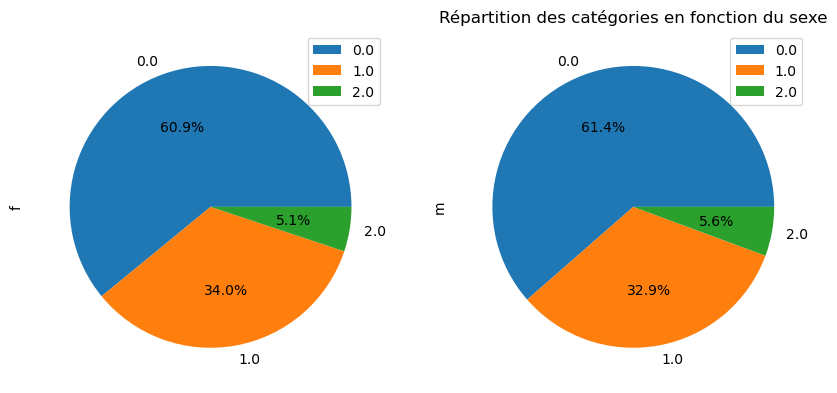

In [103]:
genre_categ_counts = pd.crosstab(ProdTransCust["categ"],ProdTransCust["sex"])

# Créer le diagramme en secteurs
genre_categ_counts.plot(kind='pie', subplots=True, figsize=(10, 6), autopct='%1.1f%%')

# Ajouter un titre au diagramme
plt.title("Répartition des catégories en fonction du sexe")

# Afficher le graphique
plt.show()

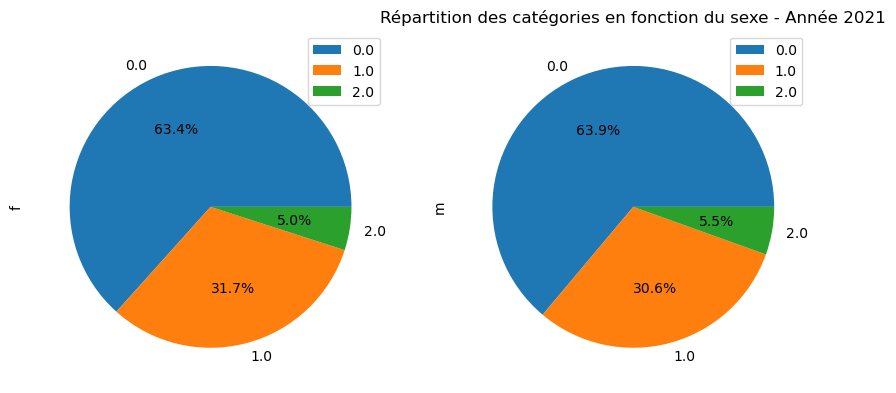

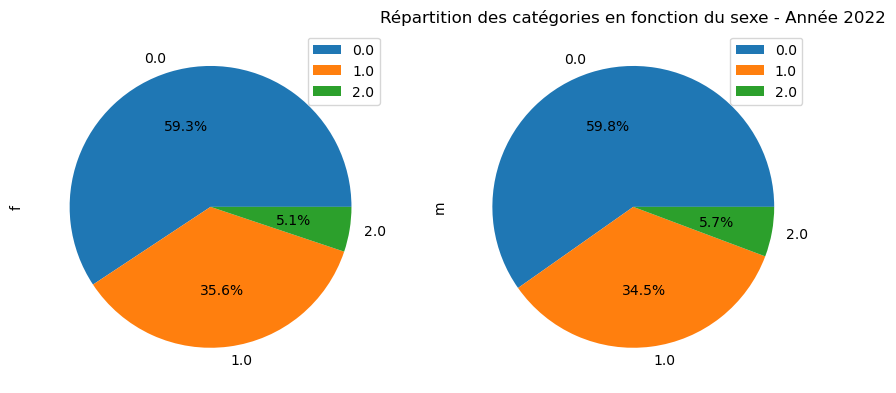

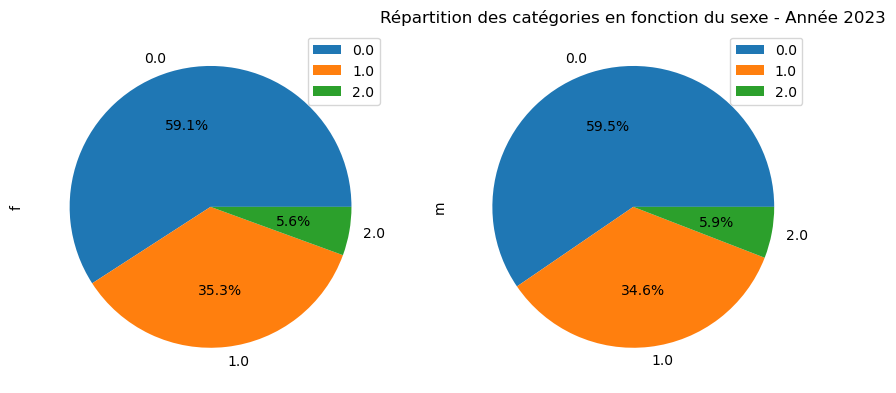

In [104]:
import matplotlib.pyplot as plt

years = [2021, 2022, 2023]

for year in years:
    # Filtrer les données pour l'année spécifique
    CATEG_SEX = ProdTransCust.loc[ProdTransCust["Année"] == year]
    
    # Effectuer un tableau croisé des catégories en fonction du sexe
    CATEG_SEX = pd.crosstab(CATEG_SEX["categ"], CATEG_SEX["sex"])
    
    # Créer le diagramme en secteurs
    CATEG_SEX.plot(kind='pie', subplots=True, figsize=(10, 6), autopct='%1.1f%%')
    
    # Ajouter un titre au diagramme
    plt.title(f"Répartition des catégories en fonction du sexe - Année {year}")
    
    # Afficher le graphique
    plt.show()


<div style="border: 1px solid RGB(0,200,100);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,200,100); ">3.3.2 - Analyse de la liaison entre le genre des clients et les catégories de livres achetés</h3>
</div>

### 1. Test du chi-carré (chi2)

#### Hypothèses
- H0 (hypothèse nulle): Il n'y a pas d'association entre les deux variables qualitatives.</a>
- H1 (hypothèse alternative): Il y a une association entre les deux variables qualitatives.</a>
#### Conditions d'utilisation
- Les deux variables sont qualitatives (catégoriques).
- Les effectifs attendus sont supérieurs à 5 pour chaque croissement de variable
Interprétation
Si la p-valeur est inférieure au seuil de significativité (généralement 0,05), on rejette l'hypothèse nulle et on conclut qu'il y a une association entre les deux variables qualitatives.

In [105]:
# Effectuer le test du chi-carré
chi2_stat, p_value, dof, expected_freq = chi2_contingency(genre_categ_counts)

# Afficher les résultats
print("Statistique du chi-carré :", chi2_stat)
print("P-valeur :", p_value)
print("Degrés de liberté :", dof)
print("Fréquences attendues :\n", expected_freq)


Statistique du chi-carré : 147.00253568681114
P-valeur : 1.1989607410166063e-32
Degrés de liberté : 2
Fréquences attendues :
 [[207066.56444861 208613.43555139]
 [113161.81769444 114007.18230556]
 [ 18173.61785695  18309.38214305]]


### 2. Coefficient de Cramér-V
Le coefficient de Cramér-V mesure la force de l'association entre deux variables qualitatives. Il varie entre 0 (pas d'association) et 1 (association parfaite).
#### Conditions d'utilisation
- Les deux variables sont qualitatives (catégoriques).
- Le test du chi-carré a déjà été effectué et a montré une association significative entre les deux variables.
#### Interprétation
Plus la valeur de Cramér-V est proche de 1 (supérieur à 0.60), plus l'association entre les deux variables est forte.

In [106]:
# Calculer le coefficient de Cramér-V

min_dim = min(genre_categ_counts.shape) - 1
cramer_v = np.sqrt(chi2_stat / (n * min_dim))

# Afficher le coefficient de Cramér-V
print("Coefficient de Cramér-V :", cramer_v)

NameError: name 'n' is not defined

<span style="color:blue"> 
   
- Les résultats de l'analyse du chi-carré suggèrent une association significative entre le genre des clients et les catégories de livres achetés.
- La valeur du chi-carré est de 147.11906816131497, indiquant une différence significative entre les catégories observées et attendues.
- La p-valeur est très faible (1.1310980597090762e-32), Il y a donc une forte preuve que le genre du client a un impact sur les catégories de livres achetées.
- Les fréquences attendues représentent ce que l'on s'attendrait à voir si le genre du client n'avait aucun lien avec les catégories de livres. Comparer les fréquences observées avec les fréquences attendues permet de voir s'il y a des différences significatives.

En résumé, il y a un certain lien  entre le genre des clients et les catégories de livres, mais l'association est faible. Des analyses supplémentaires pourraient aider à mieux comprendre cette relation.
</span>

In [ ]:
#Création d'un tableau de contigence
genre_categ_counts2 = pd.crosstab(ProdTransCust["sex"], ProdTransCust["categ"], margins=True,margins_name="Total")

genre_categ_counts2
cont=genre_categ_counts2


In [ ]:

import seaborn as sns

tx = cont.loc[:,["Total"]]
ty = cont.loc[["Total"],:]
n = len(genre_categ_counts)
indep = tx.dot(ty) / n

c = cont.fillna(0) # On remplace les valeurs nulles par 0
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1])
plt.show()

<div style="border: 1px solid RGB(0,200,100);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,200,100); "> 3.3.3 - Impact de l'âge sur le montant total des achats de livres</h3>
</div>

In [ ]:

ProdTransCust['birth']=ProdTransCust['birth'].astype(int)


In [ ]:
ProdTransCust['Age']=(ProdTransCust['Année']-ProdTransCust['birth'])
ProdTransCust=ProdTransCust.reset_index()


In [ ]:
ProdTransCust['Age']=ProdTransCust['Année']-ProdTransCust['birth']
CA_AgeClient=ProdTransCust.groupby(['Age'])['price','birth'].sum()
CA_AgeClient=CA_AgeClient.rename(columns={'price':"Chiffre d'affaires"})
CA_AgeClient=CA_AgeClient.rename(columns={'price':"Chiffre d'affaires"})
CA_AgeClient=CA_AgeClient.drop(columns=['birth'])
CA_AgeClient=CA_AgeClient.reset_index()
CA_AgeClient

In [ ]:
#Nombre d'achatpar age

plt.bar(height=CA_AgeClient["Chiffre d'affaires"], x=CA_AgeClient['Age'])
plt.ylabel("Montant total (€)", fontsize=11)


plt.yticks(fontsize=11)
plt.title("Montant total par âges", fontsize=13)
plt.grid(color='gray', linestyle='-', linewidth=0.4)
plt.show()

### 1. Montant des achats pour les moins de 40ans

In [ ]:
CA_AgeClientMoins40ans=CA_AgeClient.loc[CA_AgeClient["Age"]<40]
CA_AgeClientMoins40ans.head(10)

In [ ]:
CA_AgeClientMoins40ans.info()

In [ ]:
#Chiffre d'affaire par les clients de moins de 40 ans

plt.bar(height=CA_AgeClientMoins40ans["Chiffre d'affaires"], x=CA_AgeClientMoins40ans['Age'])
plt.xlabel("Âge", fontsize=11)
plt.ylabel("Nombre d'achat(€)", fontsize=11)
plt.yticks(fontsize=11)
plt.title("Nombre d'achat par âge", fontsize=13)
plt.grid(color='gray', linestyle='-', linewidth=0.4)
plt.show()

### 2. Montant des achats pour les plus de 40ans

In [ ]:
CA_AgeClientPlus40ans=CA_AgeClient.loc[CA_AgeClient["Age"]>=40]
CA_AgeClientPlus40ans.head(10)

In [ ]:
#Chiffre d'affaire par les clients de plus de 40 ans

plt.bar(height=CA_AgeClientPlus40ans["Chiffre d'affaires"], x=CA_AgeClientPlus40ans['Age'])
plt.legend(loc='upper right')
plt.xlabel("Âge", fontsize=11)
plt.ylabel("Chiffre d'affaires (€)", fontsize=11)
plt.yticks(fontsize=11)
plt.title("Chiffre d'affaires par âge", fontsize=13)
plt.grid(color='gray', linestyle='-', linewidth=0.4)
plt.show()

### Analyse de la corrélation entre l'âge des clients et le montant total des achats

In [ ]:
def category_ages(age):
    if age<=20:
        return '-20ans'
    elif (age>20) & (age<=30):
        return '20-30 ans'
    elif (age>30) & (age<=40):
        return '30-40 ans'
    else:
        return '+40 ans'

CA_AgeClient['Tranche age']=CA_AgeClient['Age'].map(category_ages)
CA_AgeClient

In [ ]:
X = "Tranche age" # qualitative
Y = "Chiffre d'affaires" # quantitative


modalites = CA_AgeClient[X].unique()
groupes = []
for m in modalites:
    groupes.append(CA_AgeClient[CA_AgeClient[X]==m][Y])

# Propriétés graphiques (pas très importantes)    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.title("Montant des achats par tranche d'âge", fontsize=11)
plt.xlabel("Montant des achats", fontsize=11)
plt.ylabel("Tranche d'âge", fontsize=11)
plt.show()

In [ ]:
CA_AgeClientmoins20ans=CA_AgeClient.loc[CA_AgeClient['Tranche age']=='-20ans']
CA_AgeClient20_30ans=CA_AgeClient.loc[CA_AgeClient['Tranche age']=='20-30 ans']
CA_AgeClient30_40ans=CA_AgeClient.loc[CA_AgeClient['Tranche age']=='30-40 ans']
CA_AgeClientPlus40ans=CA_AgeClient.loc[CA_AgeClient['Tranche age']=='+40 ans']

**<span style="color:blue"> Les catégories des moins de 20 ans, des 20-30 ans et des 30-40 ans ont des moyennes en montant total similaires</span>**

**<span style="color:blue"> La catégorie des plus de 40 ans a une moyenne en montant total relativement plus basse.</span>**

**<span style="color:blue"> Les catégories des moins de 20 ans et des 30-40 ans ont une plus grande dispersion des données.</span>**

**<span style="color:blue"> La catégorie des moins de 20 ans a un montant total maximum le plus élevé, tandis que la catégorie des plus de 40 ans a un montant total minimum le plus bas.</span>**

**<span style="color:blue"> Les quartiles montrent que la catégorie des moins de 20 ans a une gamme plus large de montant total.</span>**

**<span style="color:blue"> En général, les catégories des plus de 40 ans ont des montants totaux plus faibles et une plus grande variabilité par rapport aux autres.</span>**

In [ ]:
CA_AgeClientmoins20ans["Chiffre d'affaires"].describe()

In [ ]:
CA_AgeClient20_30ans["Chiffre d'affaires"].describe()

In [ ]:
CA_AgeClient30_40ans["Chiffre d'affaires"].describe()

In [ ]:
CA_AgeClientPlus40ans["Chiffre d'affaires"].describe()

In [ ]:
CA_AgeClientTrancheAge=CA_AgeClient.groupby(["Tranche age"])["Chiffre d'affaires"].sum()
CA_AgeClientTrancheAge

### 3. Test ANOVA

### Hypothèses
- H0 (hypothèse nulle): Les moyennes de tous les groupes sont égales.
- H1 (hypothèse alternative): Au moins une des moyennes des groupes est différente des autres.
### Conditions d'utilisation
- La variable quantitative est normalement distribuée dans chaque groupe.
- Les variances des groupes sont égales.
- Les observations sont indépendantes.
### Interprétation
Si la p-valeur est inférieure au seuil de significativité (généralement 0,05), on rejette l'hypothèse nulle et on conclut qu'au moins une des moyennes des groupes est significativement différente des autres.

In [ ]:
X = "Tranche age" # qualitative
Y = "Chiffre d'affaires" # quantitative



def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
eta_squared(CA_AgeClient[X],CA_AgeClient[Y])

**<span style="color:blue"> Lorsque eta² >= 0.06, on peut dire que l'effet est substantiel, les Tranches d’âge ont une forte influence sur le Montant total des achats.
Différences significatives dans les habitudes d'achat en fonction de l'âge des clients. 
</span>** 

<div style="border: 1px solid RGB(0,200,100);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,200,100); ">3.3.4 - Fréquence d'achat en fonction de l'âge des clients</h3>
</div>

In [ ]:
FreqAchat=ProdTransCust.groupby(['client_id','Age','Année'])['id_prod'].count()
FreqAchat=pd.DataFrame(FreqAchat)
FreqAchat=FreqAchat.rename(columns={'id_prod':"Nbre achat"})
FreqAchat=FreqAchat.reset_index()
FreqAchat.head(10)

In [ ]:
FreqAchat['Frequence achat annuelle']=FreqAchat['Nbre achat']/2
FreqAchat.head(10)

In [ ]:
#Fréquence d'achat par age

plt.bar(height=FreqAchat['Frequence achat annuelle'], x=FreqAchat['Age'])
plt.xlabel("Âge", fontsize=11)
plt.ylabel("Fréquence d'achat", fontsize=11)
plt.yticks(fontsize=11)
plt.title("Fréquence d'achat par âge", fontsize=13)
plt.grid(color='gray', linestyle='-', linewidth=0.4)
plt.show()

### Liste des plus gros clients

In [ ]:
GrosAcheteur=FreqAchat[["client_id","Age","Nbre achat","Frequence achat annuelle"]]


In [ ]:
GrosAcheteur=GrosAcheteur.groupby(["client_id","Age"])["Nbre achat","Frequence achat annuelle"].sum()
GrosAcheteur.reset_index()

In [ ]:
GrosAcheteur.info()

In [ ]:
GrosAcheteur=GrosAcheteur.sort_values("Nbre achat", ascending=False)
GrosAcheteur.head(10)

### Analyse de la corrélation entre les fréquence annuelle d'achat et les tranches d'âge de la clientèle

In [ ]:
def category_ages(age):
    if age<=20:
        return '-20ans'
    elif (age>20) & (age<=30):
        return '20-30 ans'
    elif (age>30) & (age<=40):
        return '30-40 ans'
    else:
        return '+40 ans'

FreqAchat['Tranche age']=FreqAchat['Age'].map(category_ages)
FreqAchat

In [ ]:
X = "Tranche age" # qualitative
Y = "Frequence achat annuelle" # quantitative


modalites = FreqAchat[X].unique()
groupes = []
for m in modalites:
    groupes.append(FreqAchat[FreqAchat[X]==m][Y])

# Propriétés graphiques (pas très importantes)    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.title("Fréquence d'achat par tranche d'âge", fontsize=11)
plt.xlabel("Tréquence d'achat", fontsize=11)
plt.ylabel("Tranche d'âge", fontsize=11)
plt.show()

**<span style="color:blue">Les clients de moins de 20 ans ont une fréquence d'achat annuelle relativement faible et stable. Les clients de 20-30 ans présentent une fréquence légèrement plus élevée, mais avec une plus grande variabilité. Les clients de 30-40 ans ont une fréquence d'achat annuelle plus élevée et plus constante. Les clients de plus de 40 ans ont une fréquence d'achat moyenne similaire à celle des clients de 20-30 ans, mais avec une dispersion plus importante, certains ayant une fréquence d'achat annuelle très élevée.</span>**

In [ ]:
FreqAchatmoins20ans=FreqAchat.loc[FreqAchat['Tranche age']=='-20ans']
FreqAchat20_30ans=FreqAchat.loc[FreqAchat['Tranche age']=='20-30 ans']
FreqAchat30_40ans=FreqAchat.loc[FreqAchat['Tranche age']=='30-40 ans']
FreqAchatPlus40ans=FreqAchat.loc[FreqAchat['Tranche age']=='+40 ans']

In [ ]:
FreqAchatmoins20ans["Frequence achat annuelle"].describe()

In [ ]:
FreqAchat20_30ans["Frequence achat annuelle"].describe()

In [ ]:
FreqAchat30_40ans["Frequence achat annuelle"].describe()

In [ ]:
FreqAchatPlus40ans["Frequence achat annuelle"].describe()

In [ ]:
#Fréquence d'achat annuelle par tranche d'âge
FreqAchatTrancheAge=FreqAchat.groupby(["Tranche age"])["Frequence achat annuelle"].sum()
FreqAchatTrancheAge

### a .Test d'ANOVA

### Hypothèses
- H0 (hypothèse nulle): Les moyennes de tous les groupes sont égales.
- H1 (hypothèse alternative): Au moins une des moyennes des groupes est différente des autres.
### Conditions d'utilisation
- La variable quantitative est normalement distribuée dans chaque groupe.
- Les variances des groupes sont égales.
- Les observations sont indépendantes.
### Interprétation
Si la p-valeur est inférieure au seuil de significativité (généralement 0,05), on rejette l'hypothèse nulle et on conclut qu'au moins une des moyennes des groupes est significativement différente des autres.


In [ ]:
X = "Tranche age" # qualitative
Y = "Frequence achat annuelle" # quantitative



def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
eta_squared(FreqAchat[X],FreqAchat[Y])

**<span style="color:blue"> Lorsque 0.01 ≤ η² < 0.06, faible association entre les tranches d'âge des clients et leur fréquence d'achat annuelle.</span>**    
**<span style="color:blue">L'âge des clients explique une très petite proportion de la variation observée dans la fréquence d'achat annuelle. </span>**
    

<div style="border: 1px solid RGB(0,200,100);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,200,100); ">3.3.5 - Variation de la taille du panier moyen en fonction de l'âge</h3>
</div>

In [ ]:
Panier_Moy=ProdTransCust.groupby(['client_id','Age','Année']).agg({'session_id':'count','price':'sum'})
Panier_Moy=Panier_Moy.rename(columns={'session_id':'Nbre achat'})
Panier_Moy=Panier_Moy.rename(columns={'price':"Chiffre d'affaires"})
Panier_Moy['Panier moyen']=Panier_Moy["Chiffre d'affaires"]/Panier_Moy['Nbre achat']
Panier_Moy=Panier_Moy.reset_index()
Panier_Moy.head(10)

### 2. Analyse de la liaison entre la taille du panier moyen  en fonction de l'âge

In [ ]:
def category_ages(age):
    if age<=20:
        return '-20ans'
    elif (age>20) & (age<=30):
        return '20-30 ans'
    elif (age>30) & (age<=40):
        return '30-40 ans'
    else:
        return '+40 ans'

Panier_Moy['Tranche age']=Panier_Moy['Age'].map(category_ages)


In [ ]:
X = "Tranche age" # qualitative
Y = "Panier moyen" # quantitative


modalites = Panier_Moy[X].unique()
groupes = []
for m in modalites:
    groupes.append(Panier_Moy[Panier_Moy[X]==m][Y])

# Propriétés graphiques (pas très importantes)    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.title("Panier moyen par tranche d'âge", fontsize=11)
plt.xlabel("Panier moyen", fontsize=11)
plt.ylabel("Tranche d'âge", fontsize=11)
plt.show()

**<span style="color:blue">Les clients de moins de 20 ans et de 20-30 ans ont des paniers moyens similaires, tandis que les clients de 30-40 ans et de plus de 40 ans ont des paniers moyens plus bas mais toujours relativement proches l'un de l'autre. Il y a une plus grande variabilité dans les tailles de panier pour les clients de moins de 20 ans et de 20-30 ans, tandis que les clients de 30-40 ans et de plus de 40 ans ont une dispersion plus faible.</span>**

In [ ]:
Panier_Moymoins20ans=Panier_Moy.loc[Panier_Moy['Tranche age']=='-20ans']
Panier_Moy20_30ans=Panier_Moy.loc[Panier_Moy['Tranche age']=='20-30 ans']
Panier_Moy30_40ans=Panier_Moy.loc[Panier_Moy['Tranche age']=='30-40 ans']
Panier_MoyPlus40ans=Panier_Moy.loc[Panier_Moy['Tranche age']=='+40 ans']

In [ ]:
Panier_Moymoins20ans["Panier moyen"].describe()

In [ ]:
Panier_Moy20_30ans["Panier moyen"].describe()

In [ ]:
Panier_Moy30_40ans["Panier moyen"].describe()

In [ ]:
Panier_MoyPlus40ans["Panier moyen"].describe()

### a .Test d'ANOVA

### Hypothèses
- H0 (hypothèse nulle): Les moyennes de tous les groupes sont égales.
- H1 (hypothèse alternative): Au moins une des moyennes des groupes est différente des autres.
### Conditions d'utilisation
- La variable quantitative est normalement distribuée dans chaque groupe.
- Les variances des groupes sont égales.
- Les observations sont indépendantes.
### Interprétation
Si la p-valeur est inférieure au seuil de significativité (généralement 0,05), on rejette l'hypothèse nulle et on conclut qu'au moins une des moyennes des groupes est significativement différente des autres.

In [ ]:
X = "Tranche age" # qualitative
Y = "Panier moyen" # quantitative



def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
eta_squared(Panier_Moy[X],Panier_Moy[Y])

**<span style="color:blue"> Lorsque  η² > 0.06, il y a une forte association entre l'âge et le panier moyen. L'âge a donc un impact significatif sur les dépenses des clients, ce qui renforce l'importance de prendre en compte cet aspect dans les décisions liées au marketing et à la stratégie commerciale.</span>**

<div style="border: 1px solid RGB(0,200,100);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,200,100); ">3.3.6 - Préférences de catégories de livres selon l'âge des clients</h3>
</div>

### 1. Création du dataframe regroupant les données par tranche d'âge et catégorie

In [ ]:

# Regrouper les données par âge et catégorie et compter les occurrences
age_categ_counts = ProdTransCust.groupby(['categ','Age']).size()

# Réorganiser les données pour avoir un DataFrame avec âge et catégories en tant que colonnes

age_categ_counts=age_categ_counts.reset_index()
age_categ_counts.head(10)

In [ ]:
def category_ages(age):
    if age<=20:
        return '-20ans'
    elif (age>20) & (age<=30):
        return '20-30 ans'
    elif (age>30) & (age<=40):
        return '30-40 ans'
    else:
        return '+40 ans'

age_categ_counts['Tranche age']=age_categ_counts['Age'].map(category_ages)
age_categ_counts=age_categ_counts.drop(columns=[0])
#Conversion des series en  type objet
age_categ_counts['categ']=age_categ_counts['categ'].astype(object)


In [ ]:
X = "Tranche age"
Y = "categ"

cont = age_categ_counts[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
cont

### 2. Analyse de la liaison entre l'âge des clients et les catégories de livre préférées

### a. Analyse variable qualitative/quantitative

### Test ANOVA

In [ ]:
X = "categ" # qualitative
Y = "Age" # quantitative



def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
eta_squared(age_categ_counts[X],age_categ_counts[Y])

**<span style="color:blue">l'eta² est très proche de zéro, ce qui indique une association négligeable entre l'âge des clients et les catégories de livres achetées.</span>**

### b. Analyse variable qualitative/qualitative

### Test de Chi-2

#### Hypothèses
- H0 (hypothèse nulle): Il n'y a pas d'association entre les deux variables qualitatives.</a>
- H1 (hypothèse alternative): Il y a une association entre les deux variables qualitatives.</a>
#### Conditions d'utilisation
- Les deux variables sont qualitatives (catégoriques).
- Les effectifs attendus sont supérieurs à 5 pour chaque croissement de variable
Interprétation
Si la p-valeur est inférieure au seuil de significativité (généralement 0,05), on rejette l'hypothèse nulle et on conclut qu'il y a une association entre les deux variables qualitatives.

In [ ]:
age_categ_counts2 = pd.crosstab(age_categ_counts["Tranche age"],age_categ_counts["categ"])
# Effectuer le test du chi-carré
chi2_stat, p_value, dof, expected_freq = chi2_contingency(age_categ_counts2)


# Afficher les résultats
print("Statistique du chi-carré :", chi2_stat)
print("P-valeur :", p_value)
print("Degrés de liberté :", dof)
print("Fréquences attendues :\n", expected_freq)

In [ ]:
# Créer le diagramme en secteurs
age_categ_counts2.plot(kind='pie', subplots=True, figsize=(15, 6), autopct='%1.1f%%')

# Ajouter un titre au diagramme
plt.title("Répartition des catégories en fonction des tranches d'âges")

# Afficher le graphique
plt.show()


**<span style="color:blue">Tranche d'âge : Plus de 40 ans</span>** 

**<span style="color:blue">Il n'y a pas de catégorie qui se démarque nettement dans cette tranche d'âge en termes de préférence d'achat.</span>** 

**<span style="color:blue">Tranche d'âge : Moins de 20 ans</span>** 

**<span style="color:blue"> Le nombre de clients dans chaque catégorie est relativement faible, ce qui peut indiquer une diversité des préférences d'achat au sein de cette tranche d'âge.</span>** 

**<span style="color:blue">Tranche d'âge : 20-30 ans</span>** 

**<span style="color:blue">Aucune catégorie ne prédomine, suggérant que les clients de cette tranche d'âge ont des comportements d'achat similaires et variés.</span>** 
    
**<span style="color:blue">Tranche d'âge : 30-40 ans</span>** 

**<span style="color:blue">Tout comme la tranche d'âge 20-30 ans, aucune catégorie ne ressort particulièrement, indiquant une similitude dans les préférences d'achat au sein de cette tranche d'âge.</span>** 

**<span style="color:blue">En résumé, pour les tranches d'âge plus élevées (plus de 40 ans), il n'y a pas de catégorie dominante en termes de préférences d'achat. Pour les tranches d'âge plus jeunes (moins de 20 ans, 20-30 ans), il existe une certaine diversité et équilibre dans les comportements d'achat. Cela indique qu'il peut être bénéfique d'adapter les offres et les stratégies marketing en fonction des différentes tranches d'âge pour répondre aux préférences spécifiques des clients.</span>** 

### 2. Coefficient de Cramér-V
Le coefficient de Cramér-V mesure la force de l'association entre deux variables qualitatives. Il varie entre 0 (pas d'association) et 1 (association parfaite).
#### Conditions d'utilisation
- Les deux variables sont qualitatives (catégoriques).
- Le test du chi-carré a déjà été effectué et a montré une association significative entre les deux variables.
#### Interprétation
Plus la valeur de Cramér-V est proche de 1 (supérieur à 0.60), plus l'association entre les deux variables est forte.

In [ ]:
# Calculer le coefficient de Cramér-V

min_dim = min(age_categ_counts.shape) - 1
cramer_v = np.sqrt(chi2_stat / (n * min_dim))

# Afficher le coefficient de Cramér-V
print("Coefficient de Cramér-V :", cramer_v)

**<span style="color:blue">Dans ce cas, la p-valeur est très proche de 1, cela signifie que le choix des catégories de livres n'est pas influencé de manière significative par l'âge des clients.</span>**

**<span style="color:blue">Le coefficient de Cramér-V mesure la force de l'association entre les variables. Une valeur proche de 0 indique une faible association, tandis qu'une valeur proche de 1 indique une forte association. Ici, le coefficient de Cramér-V est de 0.025348760300472936, ce qui indique une faible association entre la tranche d'âge des clients et les catégories de livres achetées.</span>**

**<span style="color:blue">Puisque les résultats montrent qu'il n'y a pas de lien significatif entre la tranche d'âge des clients et les catégories de livres achetées, il peut être judicieux de se concentrer davantage sur d'autres facteurs pour segmenter et cibler les clients.</span>**

In [ ]:

import seaborn as sns

tx = cont.loc[:,["Total"]]
ty = cont.loc[["Total"],:]
n = len(age_categ_counts)
indep = tx.dot(ty) / n

c = cont.fillna(0) # On remplace les valeurs nulles par 0
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1])
plt.show()

**<span style="color:blue">On constate sur cette carte thermique qu'il ya une très forte corrélation entre l'attrait des clients de -20 ans pour les catégories 0 et 1 et une corrélation forte entre l'attrait pour les livres de catégories 0 et 1 pour les tranches d'âge de 20-30ans, 30-40 ans et des +40ans. La relation est un peu moindre entre les livres de catégorie 2 et les -20ans, beaucoup plus faible pour les 20-30ans et les 30-40ans et très faible pour les +40ans. </span>** 

<div style="border: 1px solid RGB(0,200,100);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,200,100); ">3.3.6 - Répartition du chiffre d'affaires entre les clients via une courbe de Lorenz </h3>
</div>

In [ ]:
CA_Client=ProdTransCust.groupby('client_id')['price','birth'].sum()

#Renommer la colonne "price" en "Chiffre d'affaire"
CA_Client=CA_Client.rename(columns={'price':"Chiffre d'affaires"})
CA_Client=CA_Client.drop(columns=['birth'])
CA_Client = CA_Client.reset_index()
CA_Client.sort_values("Chiffre d'affaires", ascending=False)

### a.Courbe de Lorenz

In [ ]:
ChiffreAffaire_Client = CA_Client["Chiffre d'affaires"].values
n = len(ChiffreAffaire_Client)
lorenz = np.cumsum(np.sort(ChiffreAffaire_Client)) / ChiffreAffaire_Client.sum()
lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0

xaxis = np.linspace(0-1/n,1+1/n,n+1) #Il y a un segment de taille n pour chaque individu, plus 1 segment supplémentaire d'ordonnée 0. Le premier segment commence à 0-1/n, et le dernier termine à 1+1/n.
plt.plot(xaxis,lorenz,drawstyle='steps-post')
plt.plot(xaxis,lorenz,drawstyle='steps-post')

# Ajout de titre et d'étiquettes
plt.title("Répartition du chiffre d'affaires entre les clients", fontsize=13)
plt.xlabel('Part cumulatif des Clients')
plt.ylabel(" Part cumulatif du chiffre d'affaires")
plt.grid(color='gray', linestyle='-', linewidth=0.4)
plt.legend(loc='upper right')

plt.plot([0,1], [0,1]) #tracer la bisséctrice
plt.show()

### b. Déterminer l'Indice de Gini

In [ ]:
AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n # Surface sous la courbe de Lorenz. Le premier segment (lorenz[0]) est à moitié en dessous de 0, on le coupe donc en 2, on fait de même pour le dernier segment lorenz[-1] qui est à moitié au dessus de 1.
S = 0.5 - AUC # surface entre la première bissectrice et le courbe de Lorenz
gini = 2*S
gini

In [ ]:
CA_client= ProdTransCust[["client_id","price"]]
CA_client=CA_client.groupby("client_id")["price"].sum()
CA_client=CA_client.reset_index()
CA_client=CA_client.rename(columns={'price':"Chiffre d'affaires"})
CA_client=CA_client.sort_values("Chiffre d'affaires", ascending=False).head(10)
CA_client

In [ ]:
GrosAcheteur.head(10)

**<span style="color:blue">Cela suggère que la répartition du chiffre d'affaires par client est relativement équitable, mais qu'il existe tout de même une certaine disparité entre les clients. L'indice de Gini se rapproche de zéro, on peut dire que la répartition est équitable.
Ces disparités peuvent être attribuées aux 4 premiers clients qui achètent le plus et qui apportent à l'entreprise le plus de chiffre d'affaire, c_1609 en tête.</span>**

**<span style="color:red">Conclusion :</span>**

**<span style="color:red">Investir davantage dans les catégories 0 et 1, en accordant une attention particulière à la catégorie 1 qui a été la meilleure vente.</span>**

**<span style="color:red">Analyser les comportements d'achat des segments de clients pour personnaliser les offres.</span>**
**<span style="color:red">Utiliser d'autres critères que le genre. Adapter les stratégies de marketing et les offres en fonction des tranches d'âge.</span>**

- Moins de 20 ans : créer des offres spécifiques et proposer des produits à différents prix.
- 20-30 ans : analyser les facteurs influençant la fréquence d'achat et offrir des incitations spéciales.
- 30-40 ans : maintenir une communication régulière, proposer des offres spéciales et envisager un programme de fidélité.
- Plus de 40 ans : comprendre les raisons du montant total d'achat minimum et proposer des offres spécifiques.


**<span style="color:red">Pour augmenter la taille du panier moyen : offrir des incitations et utiliser des promotions telles que des réductions sur les achats en volume et des offres groupées.</span>**

**<span style="color:red">Il faut adapter les offres, les prix et les stratégies marketing en fonction des différents groupes d'âge, pour encourager la fidélité et augmenter les ventes de la librairie en ligne.</span>**
